# Prabal Ghosh

MRI

In [232]:
import nibabel as nib
from pathlib import Path
from totalsegmentator.python_api import totalsegmentator
import numpy as np
import os
import matplotlib.pyplot as plt


## Data loading 

In [233]:
import nibabel as nib
import numpy as np
import pandas as pd
import os

# File paths
mri_path = Path("c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/mri.nii.gz")    # MRI image
mask_path = Path("c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/segmentations_total_mr/iliopsoas_right.nii.gz")   # Segmentation mask

# Load the images using nibabel
mri_img = nib.load(mri_path)
print(f"Loaded MRI image shape: {mri_img.shape}")
mask_img = nib.load(mask_path)
print(f"Loaded mask image shape: {mask_img.shape}")

# Get the image data as numpy arrays
mri_data = mri_img.get_fdata()
mask_data = mask_img.get_fdata()


Loaded MRI image shape: (256, 13, 256)
Loaded mask image shape: (256, 13, 256)


In [234]:
mri_img.header

In [235]:

print(mri_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256  13 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.     1.875 10.     1.875  1.     1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -238.125
qoffset_y       : -70.0
qoffset_z       : -238.125
srow_x       

In [236]:
mask_img.header

In [237]:

print(mask_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256  13 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.     1.875 10.     1.875  1.     1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -238.125
qoffset_y       : -70.0
qoffset_z       : -238.125
srow_x        

In [238]:
mask_data[mask_data > 0].shape

(3224,)

## test 3

### find the segmented part from mri 

In [239]:
# Ensure mask is binary (0/1)
mask_data = (mask_data > 0).astype(np.float32)

# Extract region by multiplication
segmented_data = mri_data * mask_data  # Background = 0


In [240]:

# Save result
segmented_img = nib.Nifti1Image(segmented_data, mri_img.affine, mri_img.header)


save the segmented part

In [241]:
nib.save(segmented_img, 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/segmented_region_iliopsoas_right.nii.gz')


In [242]:
mask_img.header

In [243]:
mri_img.header

In [244]:
mri_img

In [245]:
mri_img.dataobj

In [246]:
segmented_img.header

In [247]:
print(mri_img.affine)
print()
print()

print(mask_img.affine)

[[   1.875    0.       0.    -238.125]
 [   0.      10.       0.     -70.   ]
 [   0.       0.       1.875 -238.125]
 [   0.       0.       0.       1.   ]]


[[   1.875    0.       0.    -238.125]
 [   0.      10.       0.     -70.   ]
 [   0.       0.       1.875 -238.125]
 [   0.       0.       0.       1.   ]]


In [248]:
segmented_img.affine

array([[   1.875,    0.   ,    0.   , -238.125],
       [   0.   ,   10.   ,    0.   ,  -70.   ],
       [   0.   ,    0.   ,    1.875, -238.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])

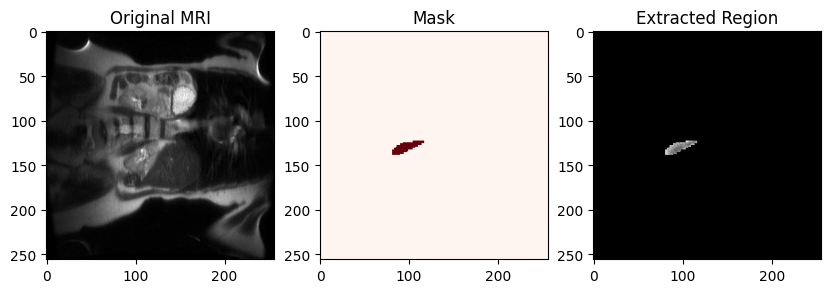

In [249]:
# (axial slice 6)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(mri_data[:, 6, :], cmap='gray')  # Original MRI
plt.title('Original MRI')
plt.subplot(1, 3, 2)
plt.imshow(mask_data[:, 6, :], cmap='Reds')  # Mask
plt.title('Mask')
plt.subplot(1, 3, 3)
plt.imshow(segmented_data[:, 6, :], cmap='gray')  # Extracted region
plt.title('Extracted Region')
plt.show()

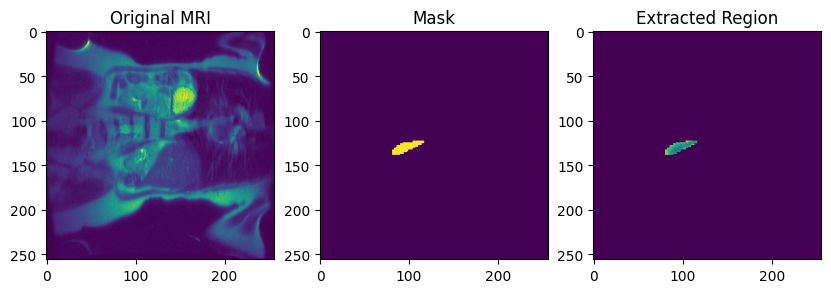

In [250]:
# (axial slice 6)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(mri_data[:, 6, :], )  # Original MRI
plt.title('Original MRI')
plt.subplot(1, 3, 2)
plt.imshow(mask_data[:, 6, :], )  # Mask
plt.title('Mask')
plt.subplot(1, 3, 3)
plt.imshow(segmented_data[:, 6, :], )  # Extracted region
plt.title('Extracted Region')
plt.show()

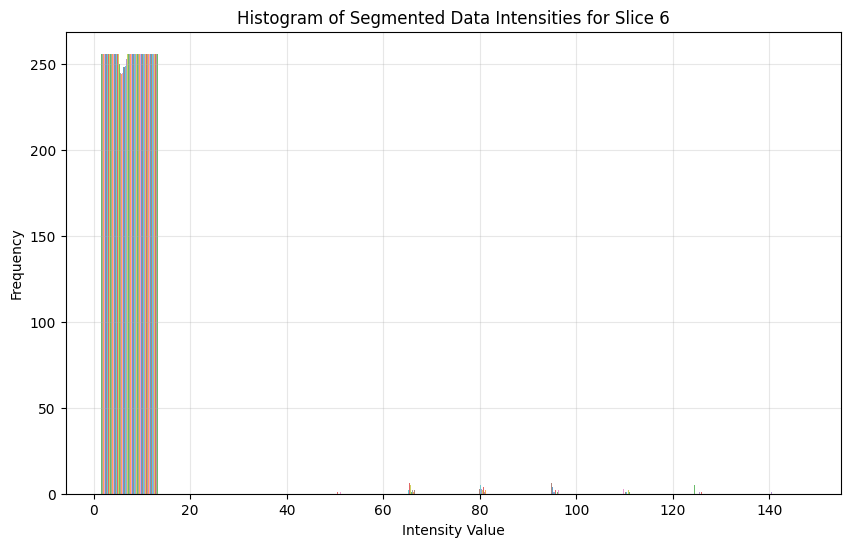

In [251]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(segmented_data[:, 6, :], alpha=0.7,)
plt.title('Histogram of Segmented Data Intensities for Slice 6')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

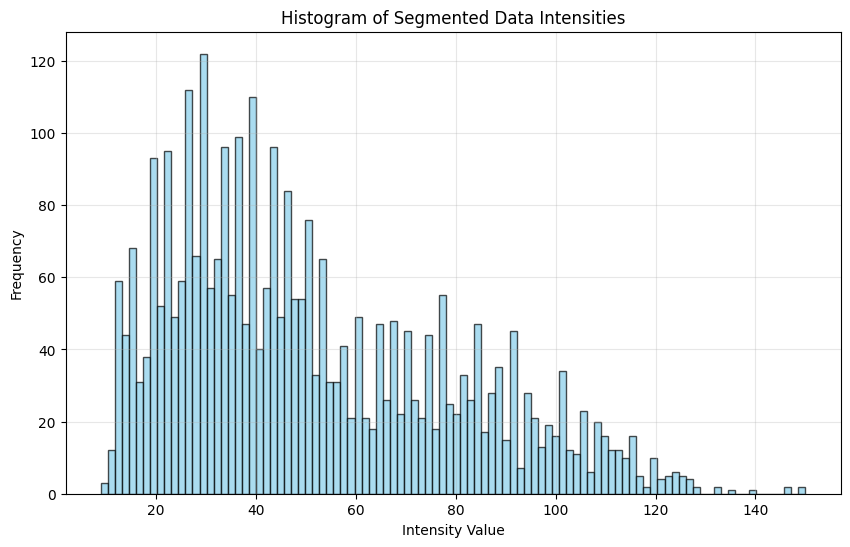

In [252]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the segmented_data array to 1D
flattened_data = segmented_data.flatten()

# Remove zero values (background) if needed
non_zero_data = flattened_data[flattened_data > 0]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_data, bins=100, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Segmented Data Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

if large high-intensity peak, likely fluid is bright → T2.


If the histogram peaks at lower intensities (with a long tail into brighter values for fat/solid tissue), likely T1.

so clearly the image is for T1

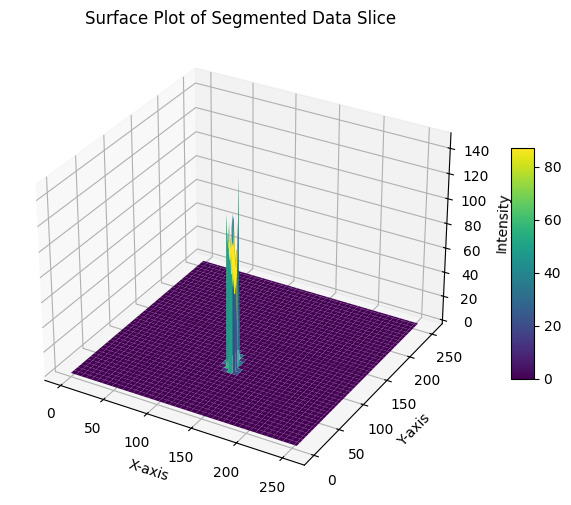

In [253]:
%matplotlib inline
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the 2D slice
slice_data = segmented_data[:, 6, :]

# Create a meshgrid for the x and y coordinates
x = np.arange(slice_data.shape[0])
y = np.arange(slice_data.shape[1])
X, Y = np.meshgrid(x, y)    # Create a grid for the x and y coordinates

# Create the surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, slice_data.T, cmap='viridis', edgecolor='none')

# Add labels and a color bar
ax.set_title('Surface Plot of Segmented Data Slice')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Intensity')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()


In [254]:
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean


In [255]:
segmented_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [256]:
# from skimage.filters.rank import entropy
# from skimage.morphology import disk
# entropy_img = entropy(segmented_data,footprint=disk( 3))

### 1. Intensity calculation 1.  Here coordinates are considered. ------------its useless.........don't use this

### working only with intensities without considering the locations 

In [257]:

# Flatten the array and remove zeros (background)
intensities = segmented_data[segmented_data > 0]

# Verify
print(f"Number of voxels in segmented region: {len(intensities)}")
print(f"Min intensity: {np.min(intensities)}, Max intensity: {np.max(intensities)}")

Number of voxels in segmented region: 3224
Min intensity: 9.0, Max intensity: 150.0


In [258]:
import pandas as pd

# Create a DataFrame 
df3 = pd.DataFrame(intensities, columns=['Intensity'])

save the dataframe

In [259]:
df3.to_csv('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/segmented_intensities.csv', index=False)


In [260]:
df3.head(10)

,Intensity
0,135.0
1,105.0
2,95.0
3,106.0
4,98.0
5,149.0
6,146.0
7,140.0
8,123.0
9,113.0


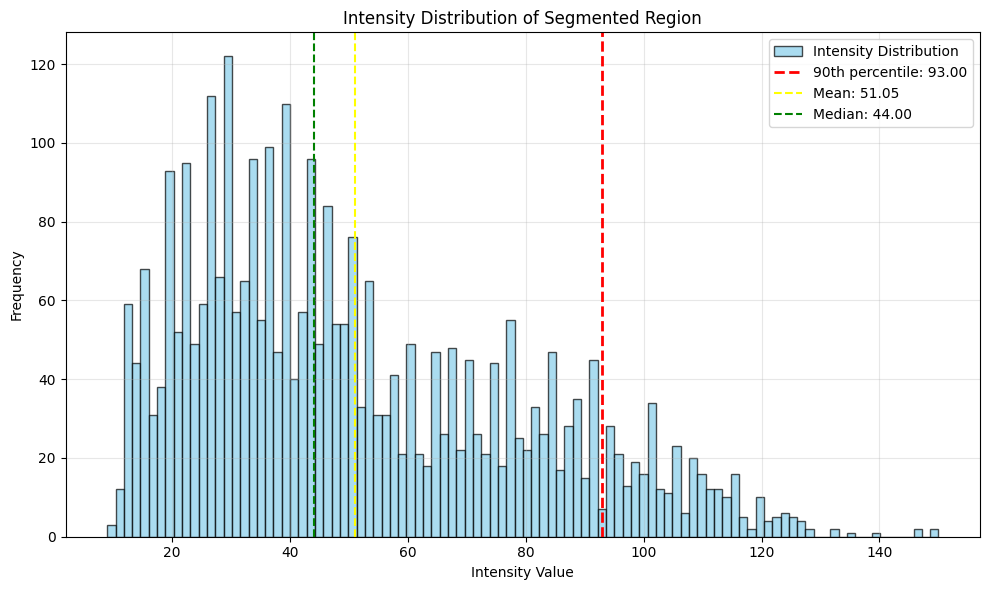

90th Percentile Threshold: 93.00
Mean Intensity: 51.05
Median Intensity: 44.00 
Standard Deviation: 27.86 
min Intensity: 9.00 
max Intensity: 150.00 


In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df3['Intensity'], bins=100, color='skyblue', alpha=0.7, edgecolor='black',label='Intensity Distribution')
plt.title('Intensity Distribution of Segmented Region')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
# plt.grid(axis='y', alpha=0.3)


threshold = df3['Intensity'].quantile(0.90)
plt.axvline(threshold, color='red', linestyle='--',linewidth=2, label=f'90th percentile: {threshold:.2f}')
plt.axvline(np.mean(intensities), color='yellow', linestyle='dashed', label=f'Mean: {np.mean(intensities):.2f}')
plt.axvline(np.median(intensities), color='green', linestyle='dashed', label=f'Median: {np.median(intensities):.2f}')
plt.legend()

plt.tight_layout()
# plt.savefig('intensity_histogram.png', dpi=300)  # Save the plot
plt.show()

# Print key stats
print(f"90th Percentile Threshold: {threshold:.2f}")
print(f"Mean Intensity: {np.mean(intensities):.2f}")
print(f"Median Intensity: {np.median(intensities):.2f} ")
print(f"Standard Deviation: {np.std(intensities):.2f} ")
print(f"min Intensity: {np.min(intensities):.2f} ")
print(f"max Intensity: {np.max(intensities):.2f} ")

two different images may have same histogram but different intensities as it dont consider the spatial information. 

##### Otsu's filter 

In [262]:
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

non_zero_data = segmented_data[segmented_data > 0]



In [263]:
#  Otsu's threshold
otsu_threshold = threshold_otsu(non_zero_data)


In [264]:
print(f"Otsu's Threshold: {otsu_threshold}")

Otsu's Threshold: 59.947265625


In [265]:

# Create a binary mask based on the threshold
binary_mask = segmented_data > otsu_threshold


In [266]:
binary_mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

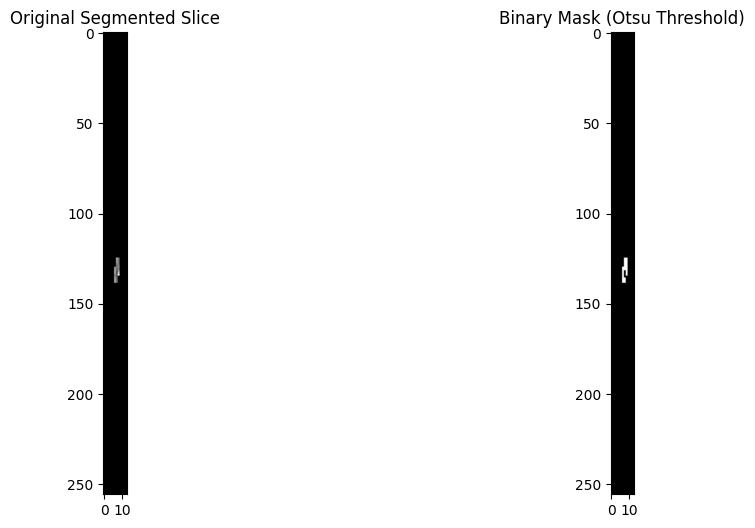

In [267]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(segmented_data[:, :, segmented_data.shape[2] // 3], cmap='gray')  
plt.title('Original Segmented Slice')
plt.subplot(1, 2, 2)
plt.imshow(binary_mask[:, :, segmented_data.shape[2] // 3], cmap='gray') 
plt.title('Binary Mask (Otsu Threshold)')
plt.show()



In [268]:
import nibabel as nib
import numpy as np

nifti_img = nib.Nifti1Image(binary_mask, affine=segmented_img.affine, header=segmented_img.header)

output_path = 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/processed_image_otsu.nii.gz'
nib.save(nifti_img, output_path)

print(f"NIfTI file saved at: {output_path}")

NIfTI file saved at: c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/processed_image_otsu.nii.gz


##### GMM Apply

In [269]:
intensities.reshape(-1, 1)

array([[135.],
       [105.],
       [ 95.],
       ...,
       [ 30.],
       [ 29.],
       [ 55.]])

### GMM 

In [270]:
from sklearn.preprocessing import StandardScaler


from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [271]:
df3

,Intensity
0,135.0
1,105.0
2,95.0
3,106.0
4,98.0
...,...
3219,35.0
3220,27.0
3221,30.0
3222,29.0


In [272]:
# Features: x, y, z, intensity
X = df3.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [273]:
X

array([[135.],
       [105.],
       [ 95.],
       ...,
       [ 30.],
       [ 29.],
       [ 55.]])

In [274]:
X_scaled = X_scaled.reshape(-1, 1)

In [275]:
X_scaled

array([[ 3.01366595],
       [ 1.93671644],
       [ 1.57773327],
       ...,
       [-0.75565735],
       [-0.79155567],
       [ 0.14180058]])

Plot BIC and AIC scores


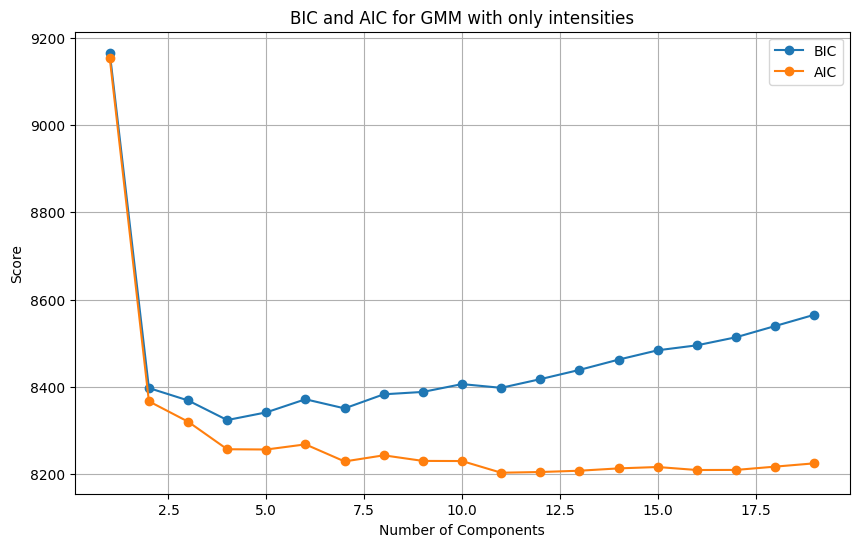

In [276]:
bic_scores = []
aic_scores = []
k_range = range(1, 20)  # Test 1 to 20 components

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

plt.figure(figsize=(10, 6))
plt.plot(k_range, bic_scores, label='BIC', marker='o')
plt.plot(k_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM with only intensities')
plt.legend()
plt.grid(True)
plt.show()

In [277]:
#  optimal number of components
optimal_aic = k_range[np.argmin(aic_scores)]  
optimal_bic = k_range[np.argmin(bic_scores)] 

print(f"Optimal number of components based on AIC:k= {optimal_aic}")
print(f"Optimal number of components based on BIC:k= {optimal_bic}")

Optimal number of components based on AIC:k= 11
Optimal number of components based on BIC:k= 4


In [278]:
# optimal_components = optimal_bic  
optimal_components = 2  

gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=2, random_state=42)

In [279]:
gmm_clusters = gmm.predict(X_scaled)
df3['cluster_gmm_based_on_only_intensity'] = gmm_clusters

In [280]:
weights = gmm.weights_
weights

array([0.35016072, 0.64983928])

In [281]:
means = gmm.means_
means

array([[ 1.116942  ],
       [-0.60185531]])

In [282]:
covars = gmm.covariances_
covars

array([[[0.5260111]],

       [[0.2209394]]])

In [283]:
X.shape

(3224, 1)

In [284]:
f = X.reshape(-1, 1)
f

array([[135.],
       [105.],
       [ 95.],
       ...,
       [ 30.],
       [ 29.],
       [ 55.]])

In [285]:
f.shape

(3224, 1)

In [286]:
x_axis = X
x_axis.sort()

In [287]:
x_axis = np.linspace(f.min(), f.max(), 1000) 

In [288]:
x_axis

array([  9.        ,   9.14114114,   9.28228228,   9.42342342,
         9.56456456,   9.70570571,   9.84684685,   9.98798799,
        10.12912913,  10.27027027,  10.41141141,  10.55255255,
        10.69369369,  10.83483483,  10.97597598,  11.11711712,
        11.25825826,  11.3993994 ,  11.54054054,  11.68168168,
        11.82282282,  11.96396396,  12.10510511,  12.24624625,
        12.38738739,  12.52852853,  12.66966967,  12.81081081,
        12.95195195,  13.09309309,  13.23423423,  13.37537538,
        13.51651652,  13.65765766,  13.7987988 ,  13.93993994,
        14.08108108,  14.22222222,  14.36336336,  14.5045045 ,
        14.64564565,  14.78678679,  14.92792793,  15.06906907,
        15.21021021,  15.35135135,  15.49249249,  15.63363363,
        15.77477477,  15.91591592,  16.05705706,  16.1981982 ,
        16.33933934,  16.48048048,  16.62162162,  16.76276276,
        16.9039039 ,  17.04504505,  17.18618619,  17.32732733,
        17.46846847,  17.60960961,  17.75075075,  17.89

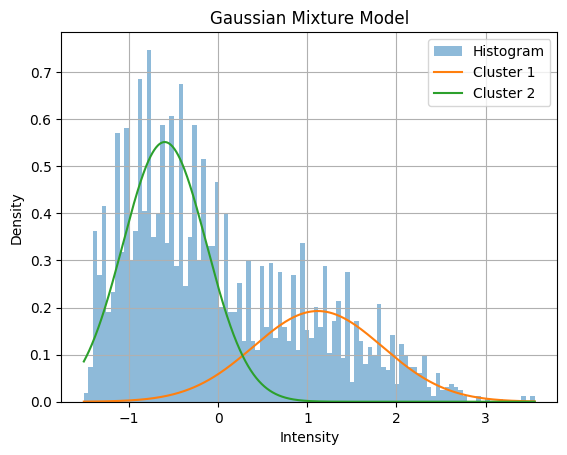

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import mixture


# Extract weights, means, and covariances
weights = gmm.weights_
means = gmm.means_.flatten()  # Flatten to 1D array
covars = gmm.covariances_.flatten()  # Flatten to 1D array

# Create x-axis for plotting
x_axis = np.linspace(X_scaled.min(), X_scaled.max(), 1000)  # Ensure it spans the range of f

# Plot histogram of the data
plt.hist(X_scaled, bins=100, histtype='bar', density=True, ec='red', alpha=0.5, label='Histogram')

# Plot Gaussian curves for each component
for i, (weight, mean, covar) in enumerate(zip(weights, means, covars)):
    plt.plot(x_axis, weight * norm.pdf(x_axis, mean, np.sqrt(covar)), label=f'Cluster {i+1}')

# Add grid, legend, and show plot
plt.grid()
plt.legend()
plt.title('Gaussian Mixture Model')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.show()

In [290]:
df3

,Intensity,cluster_gmm_based_on_only_intensity
0,135.0,0
1,105.0,0
2,95.0,0
3,106.0,0
4,98.0,0
...,...,...
3219,35.0,1
3220,27.0,1
3221,30.0,1
3222,29.0,1


In [291]:
df3["cluster_gmm_based_on_only_intensity"].unique()

array([0, 1], dtype=int64)

In [292]:
df3['cluster_gmm_based_on_only_intensity'] = df3['cluster_gmm_based_on_only_intensity'].replace(0, 2)   

In [293]:
df3

,Intensity,cluster_gmm_based_on_only_intensity
0,135.0,2
1,105.0,2
2,95.0,2
3,106.0,2
4,98.0,2
...,...,...
3219,35.0,1
3220,27.0,1
3221,30.0,1
3222,29.0,1


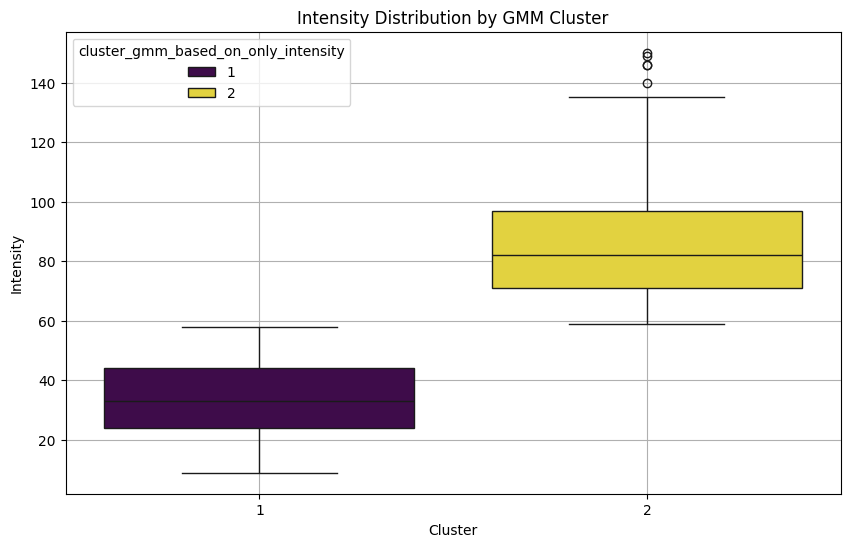

In [294]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_gmm_based_on_only_intensity', y='Intensity', data=df3, palette='viridis', hue="cluster_gmm_based_on_only_intensity")
plt.title('Intensity Distribution by GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

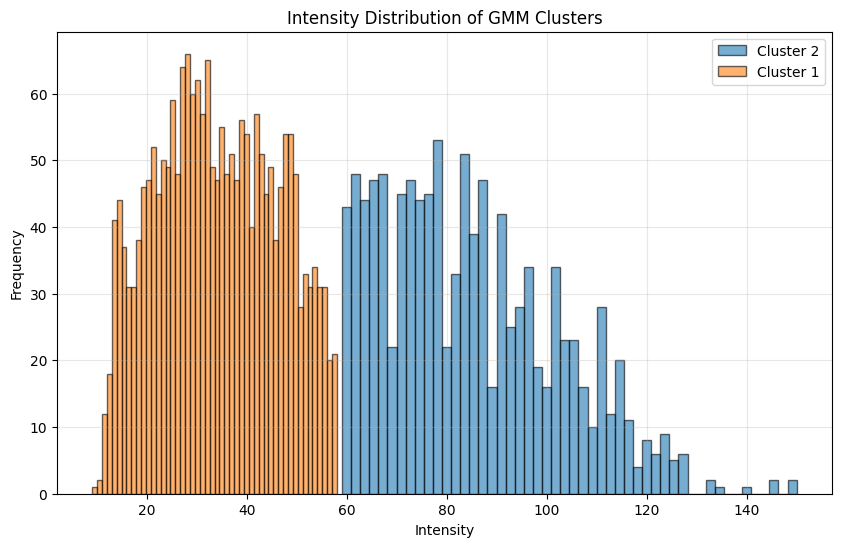

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plot the distribution of the two clusters using a histogram
plt.figure(figsize=(10, 6))
for cluster in df3['cluster_gmm_based_on_only_intensity'].unique():
    cluster_data = df3[df3['cluster_gmm_based_on_only_intensity'] == cluster]
    plt.hist(cluster_data['Intensity'], bins=50, alpha=0.6, edgecolor='black',label=f'Cluster {cluster}')

plt.title('Intensity Distribution of GMM Clusters')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Cluster 1 - Mean: 34.08, Variance: 151.83
Cluster 2 - Mean: 84.70, Variance: 310.12
Separation Intensity: 59.39


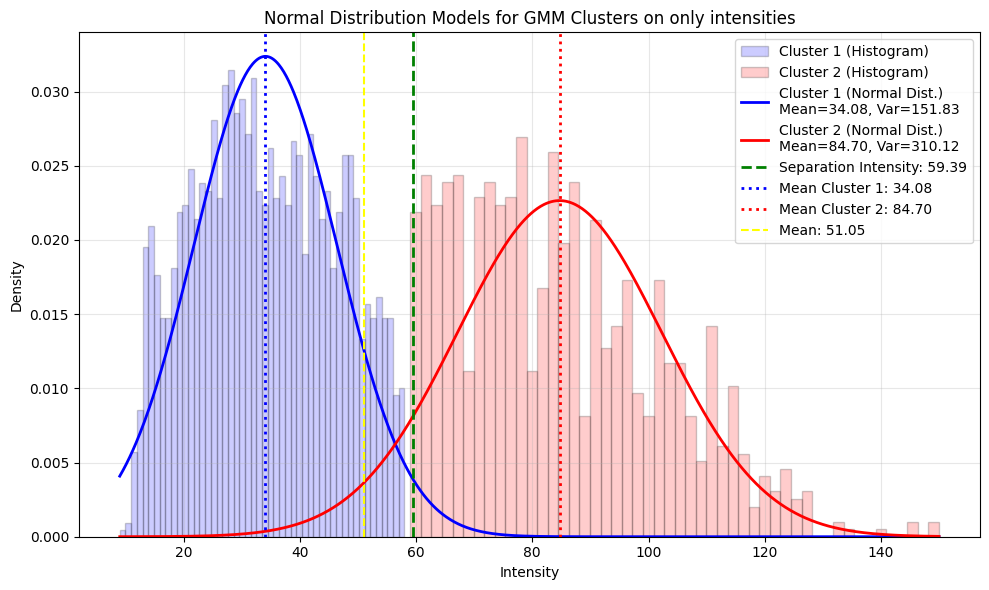

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

cluster_1 = df3[df3['cluster_gmm_based_on_only_intensity'] == 1]['Intensity']
cluster_2 = df3[df3['cluster_gmm_based_on_only_intensity'] == 2]['Intensity']

mean_1 = cluster_1.mean()
var_1 = cluster_1.var()
mean_2 = cluster_2.mean()
var_2 = cluster_2.var()
std_1 = np.sqrt(var_1)
std_2 = np.sqrt(var_2)

print(f"Cluster 1 - Mean: {mean_1:.2f}, Variance: {var_1:.2f}")
print(f"Cluster 2 - Mean: {mean_2:.2f}, Variance: {var_2:.2f}")


# the separation intensity (midpoint between the means)
separation_intensity = (mean_1 + mean_2) / 2
print(f"Separation Intensity: {separation_intensity:.2f}")


# values for plotting the normal distributions
x = np.linspace(df3['Intensity'].min(), df3['Intensity'].max(), 1000)

# the normal distribution for each cluster
pdf_1 = norm.pdf(x, mean_1, np.sqrt(var_1))
pdf_2 = norm.pdf(x, mean_2, np.sqrt(var_2))

plt.figure(figsize=(10, 6))
plt.hist(cluster_1, bins=50, density=True, alpha=0.2, color='blue',edgecolor='black', label='Cluster 1 (Histogram)')
plt.hist(cluster_2, bins=50, density=True, alpha=0.2, color='red',edgecolor='black',  label='Cluster 2 (Histogram)')
plt.plot(x, pdf_1, color='blue', linewidth=2, label=f'Cluster 1 (Normal Dist.)\nMean={mean_1:.2f}, Var={var_1:.2f}')
plt.plot(x, pdf_2, color='red', linewidth=2, label=f'Cluster 2 (Normal Dist.)\nMean={mean_2:.2f}, Var={var_2:.2f}')

plt.axvline(separation_intensity, color='green', linestyle='--', linewidth=2, label=f'Separation Intensity: {separation_intensity:.2f}')
plt.axvline(mean_1, color='blue', linestyle=':', linewidth=2, label=f'Mean Cluster 1: {mean_1:.2f}')
plt.axvline(mean_2, color='red', linestyle=':', linewidth=2, label=f'Mean Cluster 2: {mean_2:.2f}')
plt.axvline(np.mean(intensities), color='yellow', linestyle='dashed', label=f'Mean: {np.mean(intensities):.2f}')

plt.title('Normal Distribution Models for GMM Clusters on only intensities')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [67]:

# binary mask  (True = segmented region) (where intensities > 0)
mask = segmented_data > 0

# Extract coordinates (x, y, z) and intensities of non-zero voxels
# ---------Get voxel coordinates of the segmented region  ---------------------------------  it extracts the 3D positions (x, y, z) of all voxels in the segmented region of the MRI.
coordinates = np.argwhere(mask)  # Shape: (N, 3) where N = number of non-zero voxels

# Extract the corresponding intensities using the mask
intensities = segmented_data[mask]  # Shape: (N,)


# Verify shapes
print(f"Coordinates shape: {coordinates.shape}, Intensities shape: {intensities.shape}")



Coordinates shape: (3224, 3), Intensities shape: (3224,)


In [68]:
# coordinates

In [69]:

# Create a DataFrame with columns: x, y, z, intensity
df = pd.DataFrame({
    'x': coordinates[:, 0],
    'y': coordinates[:, 1],
    'z': coordinates[:, 2]
})


In [70]:
df

,x,y,z
0,123,5,115
1,123,5,116
2,123,5,117
3,123,5,118
4,123,5,119
...,...,...,...
3219,171,10,42
3220,171,11,32
3221,171,11,35
3222,171,11,36


In [71]:
import pandas as pd


# Merge the two DataFrames
merged_df = pd.concat([df, df3], axis=1)

print(merged_df.head())

     x  y    z  Intensity  cluster_gmm_based_on_only_intensity
0  123  5  115      135.0                                    2
1  123  5  116      105.0                                    2
2  123  5  117       95.0                                    2
3  123  5  118      106.0                                    2
4  123  5  119       98.0                                    2


In [72]:
# Save to CSV

# merged_df.to_csv('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/segmented_intensities_with_coordinates.csv', index=False)


In [73]:
cluster_based_on_intensity_map_gmm = np.zeros_like(segmented_data, dtype=np.int32)


In [74]:
# Map the clusters back to the 3D array
for i, (x, y, z) in enumerate(merged_df[['x', 'y', 'z']].values):
    cluster_based_on_intensity_map_gmm[x, y, z] = merged_df['cluster_gmm_based_on_only_intensity'].iloc[i]  

In [75]:
cluster_img_gmm = nib.Nifti1Image(cluster_based_on_intensity_map_gmm, segmented_img.affine, segmented_img.header)

In [76]:

nib.save(cluster_img_gmm, 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/gmm_cluster_based_on_intensity_labels.nii.gz')

print("GMM Clustered NIfTI file saved as 'gmm_cluster_based_on_intensity_labels.nii.gz'")

GMM Clustered NIfTI file saved as 'gmm_cluster_based_on_intensity_labels.nii.gz'


##### now i will calculate the volume , cross sectional area, total pixels in the cluster and fat signal intensity and wahter signal intensity

In [77]:
hdr = cluster_img_gmm.header

In [78]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256  13 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.     1.875 10.     1.875  1.     1.     1.     1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -238.125
qoffset_y       : -70.0
qoffset_z       : -238.125
srow_x       

In [79]:
print(hdr.get_data_shape())

(256, 13, 256)


In [80]:
print(hdr.get_data_dtype())

int16


In [81]:
print(hdr.get_zooms())

(1.875, 10.0, 1.875)


In [82]:
hdr['pixdim'][1:4]

array([ 1.875, 10.   ,  1.875], dtype=float32)

##### calculate the boundary volume

In [83]:
# Voxel dimensions from header (pixdim[1], pixdim[2], pixdim[3])

dx, dy, dz = hdr['pixdim'][1:4]   #  (1.875, 10.0, 1.875) in mm
voxel_volume_mm3 = dx * dy * dz   # mm³ per voxel
print(f"Voxel volume: {voxel_volume_mm3} mm³")


Voxel volume: 35.15625 mm³


In [84]:
# merged_df.head()

In [85]:
voxel_counts = merged_df['cluster_gmm_based_on_only_intensity'].value_counts().sort_index()
voxel_counts

cluster_gmm_based_on_only_intensity
1    2143
2    1081
Name: count, dtype: int64

In [86]:
len(merged_df['cluster_gmm_based_on_only_intensity'])

3224

In [87]:

for clust_label, count in voxel_counts.items():
    print(f"Cluster {clust_label}: {count} voxels")

Cluster 1: 2143 voxels
Cluster 2: 1081 voxels


In [88]:
# boundary volume per cluster (in mm³)
volumes_mm3 = voxel_counts * voxel_volume_mm3
volumes_mL  = volumes_mm3 / 1000.0
volumes_mL

cluster_gmm_based_on_only_intensity
1    75.339844
2    38.003906
Name: count, dtype: float64

In [89]:

for clust_label, count in voxel_counts.items():
    v_ml = volumes_mL.loc[clust_label]
    print(f"Cluster {clust_label}: {count} voxels  →  {v_ml:.2f} mL")

Cluster 1: 2143 voxels  →  75.34 mL
Cluster 2: 1081 voxels  →  38.00 mL


In [90]:
volumes_mm3

cluster_gmm_based_on_only_intensity
1    75339.84375
2    38003.90625
Name: count, dtype: float64

here i assumed that cluster 2 in for fat as the intensity is higher compared to cluster 1.

##### calculate the cross sectional area slice by slice

In [91]:
merged_df

,x,y,z,Intensity,cluster_gmm_based_on_only_intensity
0,123,5,115,135.0,2
1,123,5,116,105.0,2
2,123,5,117,95.0,2
3,123,5,118,106.0,2
4,123,5,119,98.0,2
...,...,...,...,...,...
3219,171,10,42,35.0,1
3220,171,11,32,27.0,1
3221,171,11,35,30.0,1
3222,171,11,36,29.0,1


##### CSA calculation method 1

In [92]:
# Create a pivot table of counts per (cluster, z-slice)  
# z: Represents the slice index along the Z-axis in the 3D MRI data.  # This is useful for analyzing how the clusters are distributed across different slices of the MRI volume.

slice_counts = merged_df.groupby(['cluster_gmm_based_on_only_intensity','z']).size().unstack(fill_value=0)


In [93]:
slice_counts

z,13,14,15,16,17,18,19,20,21,22,...,112,113,114,115,116,117,118,119,120,121
cluster_gmm_based_on_only_intensity,,,,,,,,,,,,,,,,,,,,,
1,3,8,8,10,10,10,12,12,13,17,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,10,10,8,8,8,5,5,5,1,1


In [94]:
# np.arange(segmented_data.shape[2])

In [95]:
dx * dy    # area of a voxel in mm²

18.75

In [96]:
slice_areas_mm2 = slice_counts * (dx * dy)


In [97]:
slice_areas_mm2

z,13,14,15,16,17,18,19,20,21,22,...,112,113,114,115,116,117,118,119,120,121
cluster_gmm_based_on_only_intensity,,,,,,,,,,,,,,,,,,,,,
1,56.25,150.0,150.0,187.5,187.5,187.5,225.0,225.0,243.75,318.75,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,187.5,187.5,150.0,150.0,150.0,93.75,93.75,93.75,18.75,18.75


In [98]:
slice_areas_mm2.value_counts()

13     14     15     16     17     18     19     20     21      22      23      24     25     26     27     28     29      30     31     32     33     34     35      36      37     38     39     40     41      42      43      44      45     46       47       48      49      50      51      52      53     54      55      56      57      58     59     60      61     62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80     81      82      83      84      85      86      87      88      89      90     91      92      93     94      95      96      97      98      99      100    101    102    103    104     105     106     107     108     109     110     111     112    113    114    115    116    117    118    119    120    121  
0.00   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.00    0.00    0.00    0.0    0.0    0.0    0.0    0.0    0.00    0.0    0.0    0.0    0.0    0.0    0.00    0.00 

In [99]:
print("\nCluster 1 cross-sectional areas (mm²) per z-slice:")
print(slice_areas_mm2.loc[1])


Cluster 1 cross-sectional areas (mm²) per z-slice:
z
13      56.25
14     150.00
15     150.00
16     187.50
17     187.50
        ...  
117      0.00
118      0.00
119      0.00
120      0.00
121      0.00
Name: 1, Length: 109, dtype: float64


In [100]:
slice_areas_mm2[96]

cluster_gmm_based_on_only_intensity
1     56.25
2    375.00
Name: 96, dtype: float64

**CSA VS AXIAL SLICE PLOT**

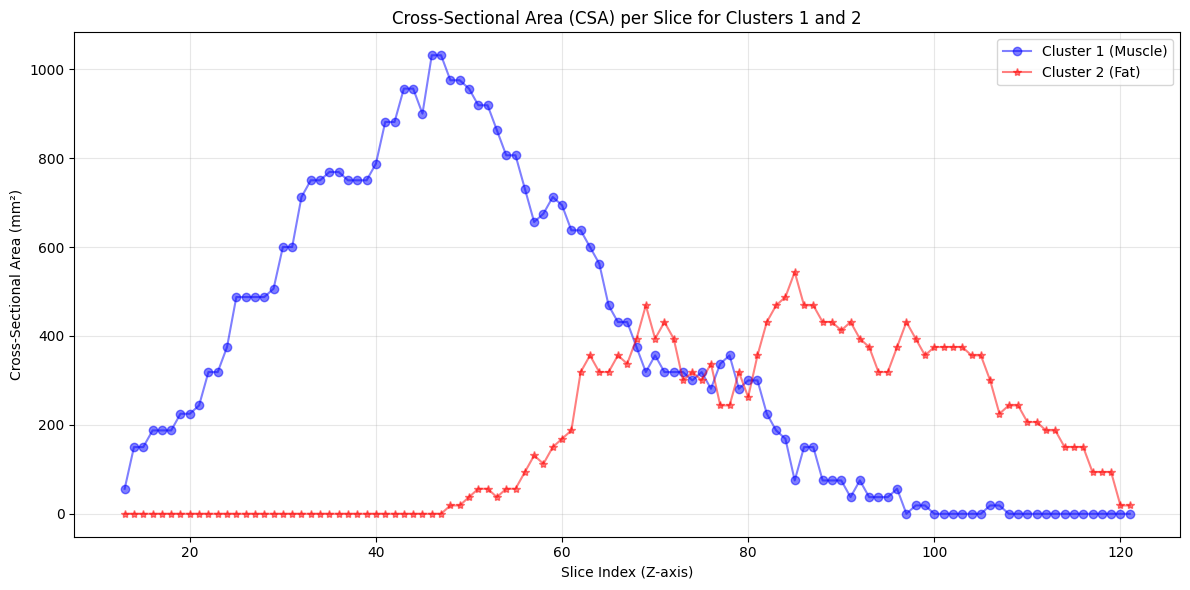

In [101]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
slice_areas_mm2_transposed = slice_areas_mm2.T

# Plot the CSA for cluster 1 and cluster 2
plt.figure(figsize=(12, 6))
plt.plot(slice_areas_mm2_transposed.index, slice_areas_mm2_transposed[1], label='Cluster 1 (Muscle)', color='blue', marker='o',alpha=0.5)
plt.plot(slice_areas_mm2_transposed.index, slice_areas_mm2_transposed[2], label='Cluster 2 (Fat)', color='red', marker='*',alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Slice Index (Z-axis)')
plt.ylabel('Cross-Sectional Area (mm²)')
plt.title('Cross-Sectional Area (CSA) per Slice for Clusters 1 and 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

##### CSA calculation method 2

In [102]:
gmm_clustered_segmentation_mask = nib.load("c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/gmm_cluster_based_on_intensity_labels.nii.gz")
mask_gmm = gmm_clustered_segmentation_mask.get_fdata()  # shape (X, Y, Z)
hdr  = gmm_clustered_segmentation_mask.header

In [103]:
mask_gmm.shape

(256, 13, 256)

In [104]:
# Voxel spacings (mm) from header: pixdim[1]=dx, pixdim[2]=dy
dx, dy = hdr['pixdim'][1], hdr['pixdim'][2]
pixel_area_mm2 = dx * dy

In [105]:
pixel_area_mm2

18.75

In [106]:
mask_gmm[:, :, 1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
mask_gmm[:, :, 1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
np.unique(mask_gmm)

array([0., 1., 2.])

In [109]:
records = []

# Identify unique cluster labels (e.g., 0=background, 1=fat, 2=water)
for cl in np.unique(mask_gmm):
    if cl == 0:  # Skip background cluster
        continue
    # For each slice along Z
    for z in range(mask_gmm.shape[2]):
        # Count pixels of this cluster in slice z
        count = np.sum(mask_gmm[:, :, z] == cl)
        if count > 0:  # Only record slices with non-zero pixels
            # Compute CSA (Cross-Sectional Area)
            csa = count * pixel_area_mm2
            # Record
            records.append({
                'cluster': cl,
                'slice_index': z,
                'pixel_count': int(count),
                'csa_mm2': float(csa)
            })



In [110]:
records = []

# For each slice along Z
for z in range(mask_gmm.shape[2]):
    # Identify unique cluster labels in the current slice (e.g., 0=background, 1=fat, 2=water)
    for cl in np.unique(mask_gmm[:, :, z]):
        if cl == 0:  # Skip background cluster
            continue
        # Count pixels of this cluster in slice z
        count = np.sum(mask_gmm[:, :, z] == cl)
        if count > 0:  # Only record slices with non-zero pixels
            # Compute CSA (Cross-Sectional Area)
            csa = count * pixel_area_mm2
            # Record
            records.append({
                'slice_index': z,
                'cluster': cl,
                'pixel_count': int(count),
                'csa_mm2': float(csa)
            })

# Convert to DataFrame for analysis
df_csa = pd.DataFrame.from_records(records)

# Example: show first few rows
print(df_csa.head())

   slice_index  cluster  pixel_count  csa_mm2
0           13      1.0            3    56.25
1           14      1.0            8   150.00
2           15      1.0            8   150.00
3           16      1.0           10   187.50
4           17      1.0           10   187.50


In [111]:
df_csa.shape

(162, 4)

In [112]:
df_csa[df_csa["slice_index" ] == 96]

,slice_index,cluster,pixel_count,csa_mm2
131,96,1.0,3,56.25
132,96,2.0,20,375.00


In [113]:
for k in df_csa["slice_index"].unique():
    print(f"Slice {k}:")
    print(df_csa[df_csa["slice_index"] == k])
    print("\n")
    # Print counts of each cluster in this slice
    df_csa[df_csa["slice_index"] == k].groupby("cluster")["pixel_count"].sum()

Slice 13:
   slice_index  cluster  pixel_count  csa_mm2
0           13      1.0            3    56.25


Slice 14:
   slice_index  cluster  pixel_count  csa_mm2
1           14      1.0            8    150.0


Slice 15:
   slice_index  cluster  pixel_count  csa_mm2
2           15      1.0            8    150.0


Slice 16:
   slice_index  cluster  pixel_count  csa_mm2
3           16      1.0           10    187.5


Slice 17:
   slice_index  cluster  pixel_count  csa_mm2
4           17      1.0           10    187.5


Slice 18:
   slice_index  cluster  pixel_count  csa_mm2
5           18      1.0           10    187.5


Slice 19:
   slice_index  cluster  pixel_count  csa_mm2
6           19      1.0           12    225.0


Slice 20:
   slice_index  cluster  pixel_count  csa_mm2
7           20      1.0           12    225.0


Slice 21:
   slice_index  cluster  pixel_count  csa_mm2
8           21      1.0           13   243.75


Slice 22:
   slice_index  cluster  pixel_count  csa_mm2
9       

In [114]:
# Save results if desired

df_csa.to_csv("cluster_slice_csa.csv", index=False)

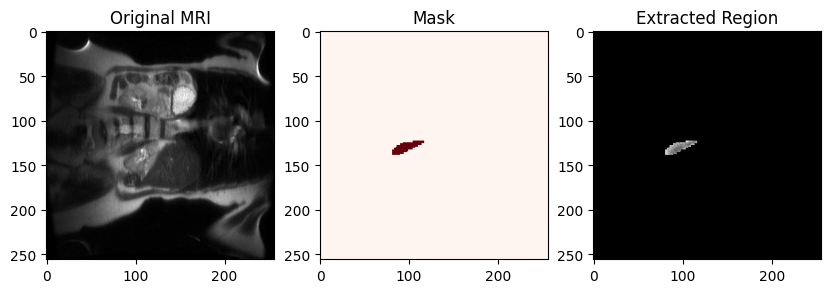

In [115]:
# (axial slice 6)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(mri_data[:, 6, :], cmap='gray')  # Original MRI
plt.title('Original MRI')
plt.subplot(1, 3, 2)
plt.imshow(mask_data[:, 6, :], cmap='Reds')  # Mask
plt.title('Mask')
plt.subplot(1, 3, 3)
plt.imshow(segmented_data[:, 6, :], cmap='gray')  # Extracted region
plt.title('Extracted Region')
plt.show()

Text(0.5, 1.0, 'GMM Clustered Segmentation Mask')

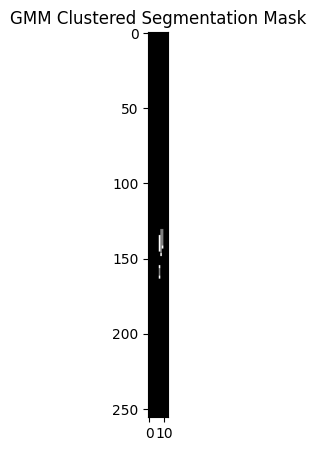

In [116]:
plt.figure(figsize=(10, 5))
plt.imshow(gmm_clustered_segmentation_mask.get_fdata()[:, :, 63], cmap='gray')  # Original MRI
plt.title('GMM Clustered Segmentation Mask')

**CSA VS AXIAL SLICE PLOT**

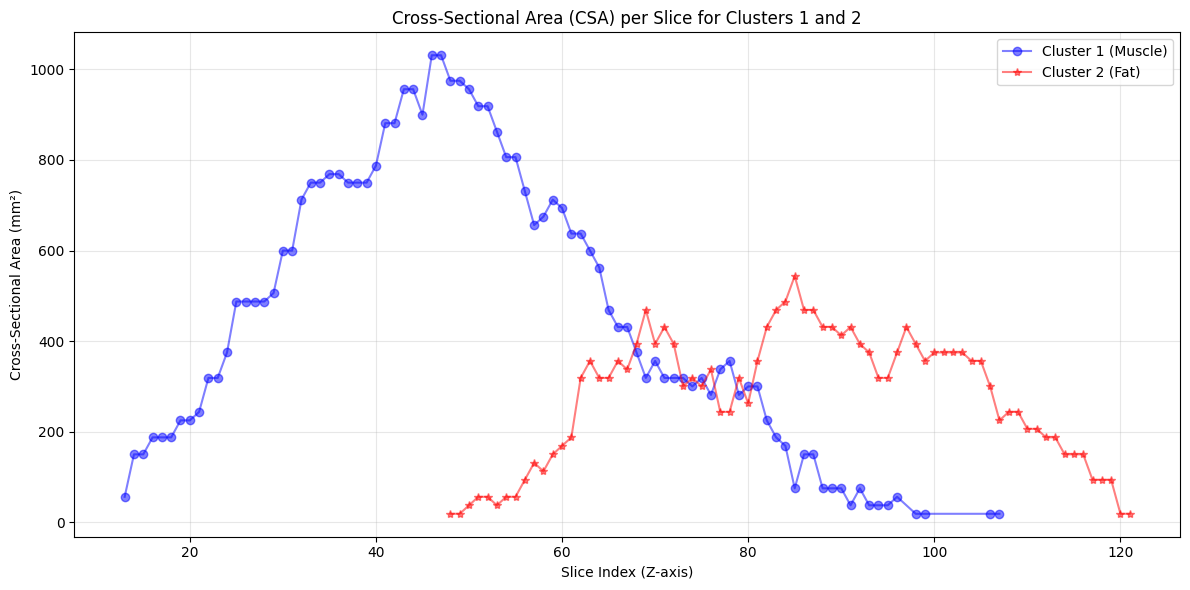

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate data for clusters 1 and 2
cluster_1 = df_csa[df_csa['cluster'] == 1]
cluster_2 = df_csa[df_csa['cluster'] == 2]

# Plot the CSA for cluster 1 and cluster 2
plt.figure(figsize=(12, 6))
plt.plot(cluster_1['slice_index'], cluster_1['csa_mm2'], label='Cluster 1 (Muscle)', color='blue', marker='o', alpha=0.5)
plt.plot(cluster_2['slice_index'], cluster_2['csa_mm2'], label='Cluster 2 (Fat)', color='red', marker='*', alpha=0.5)

plt.xlabel('Slice Index (Z-axis)')
plt.ylabel('Cross-Sectional Area (mm²)')
plt.title('Cross-Sectional Area (CSA) per Slice for Clusters 1 and 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## FF , FAT VOLUME , LEAN VOLUME MUSCLE

Therefore, in T1-weighted MRI:

On T1-weighted images, fat is bright, water/fluid is dark, and muscle is of intermediate signal.


From the fat-only image, extract the pixel intensity values. These values represent the Fat Signal Intensity (FSI) for each pixel.


From the water-only image, extract the pixel intensity values. These values represent the Water Signal Intensity (WSI) for each pixel


But I dont have T1 dixon image so I am just doing gmm (cluster 2) clustering where cluster 1 contains low intensities and   cluster 2 contains higher intensities. that means cluster 1 represents dark part that is muscles and cluster 2 represent bright part that is fat.


In [118]:
import numpy as np
import pandas as pd

# Cluster 1 represents muscle (low intensity), Cluster 2 represents fat (high intensity)

# Initialize FSI and WSI arrays
merged_df['FSI'] = 0.0  # Fat Signal Intensity
merged_df['WSI'] = 0.0  # Water Signal Intensity

# Assign FSI and WSI based on cluster labels
merged_df.loc[merged_df['cluster_gmm_based_on_only_intensity'] == 2, 'FSI'] = merged_df['Intensity']
merged_df.loc[merged_df['cluster_gmm_based_on_only_intensity'] == 1, 'WSI'] = merged_df['Intensity']

print(merged_df[['x', 'y', 'z', 'Intensity', 'cluster_gmm_based_on_only_intensity', 'FSI', 'WSI']].head())



     x  y    z  Intensity  cluster_gmm_based_on_only_intensity    FSI  WSI
0  123  5  115      135.0                                    2  135.0  0.0
1  123  5  116      105.0                                    2  105.0  0.0
2  123  5  117       95.0                                    2   95.0  0.0
3  123  5  118      106.0                                    2  106.0  0.0
4  123  5  119       98.0                                    2   98.0  0.0


In [119]:
# Save the updated DataFrame to a CSV file if needed

merged_df.to_csv('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/segmented_intensities_with_FSI_WSI.csv', index=False)

#### calculate the fatfraction for each muscle 

In [120]:
import numpy as np
import pandas as pd

# Calculate Fat Fraction (FF) for each muscle
# TP: Total number of pixels in the muscle
# FSI: Fat Signal Intensity
# WSI: Water Signal Intensity

# Add a new column for Fat Fraction
merged_df['FatFraction'] = 0.0

# Calculate Fat Fraction for each pixel
merged_df['FatFraction'] = merged_df['FSI'] / (merged_df['FSI'] + merged_df['WSI'])




In [121]:
merged_df.head(10)

,x,y,z,Intensity,cluster_gmm_based_on_only_intensity,FSI,WSI,FatFraction
0,123,5,115,135.0,2,135.0,0.0,1.0
1,123,5,116,105.0,2,105.0,0.0,1.0
2,123,5,117,95.0,2,95.0,0.0,1.0
3,123,5,118,106.0,2,106.0,0.0,1.0
4,123,5,119,98.0,2,98.0,0.0,1.0
5,123,6,104,149.0,2,149.0,0.0,1.0
6,123,6,105,146.0,2,146.0,0.0,1.0
7,123,6,106,140.0,2,140.0,0.0,1.0
8,123,6,107,123.0,2,123.0,0.0,1.0
9,123,6,108,113.0,2,113.0,0.0,1.0


In [122]:
merged_df.shape[0]

3224

In [123]:
merged_df['FatFraction'] = merged_df['FatFraction'].fillna(0)


In [124]:


# Save the updated DataFrame to a CSV file 
merged_df.to_csv('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/segmented_intensities_with_FatFraction.csv', index=False)

#### calculate fat fraction muscle 

In [125]:
# total number of pixels in the muscle
total_pixels = merged_df.shape[0]  # Total number of pixels in the muscle
print(f"Total number of pixels in the muscle: {total_pixels}")

Total number of pixels in the muscle: 3224


In [126]:
merged_df['FatFraction'].describe()

count    3224.000000
mean        0.335298
std         0.472168
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: FatFraction, dtype: float64

In [127]:
FatFraction_muscle = merged_df['FatFraction'].sum() *(1/total_pixels) *100
print(f"Fat Fraction in the muscle: {FatFraction_muscle:.2f}%")

Fat Fraction in the muscle: 33.53%


#### calculate fat volume muscle

In [128]:
volumes_mL

cluster_gmm_based_on_only_intensity
1    75.339844
2    38.003906
Name: count, dtype: float64

In [129]:
volumes_mm3

cluster_gmm_based_on_only_intensity
1    75339.84375
2    38003.90625
Name: count, dtype: float64

In [130]:
volumes_mL

cluster_gmm_based_on_only_intensity
1    75.339844
2    38.003906
Name: count, dtype: float64

In [131]:
# the boundary volume is the total volume of fat and muscles 
boundary_volume_mm3 = volumes_mm3.sum()
boundary_volume_mm3

113343.75

**in T2 fat is less bright and water is bright and muscle is intermediate signal**

cluster 2 contains high intensities so it is for fat and cluster 1 is for muscles.


So  I should use cluster 1 volume for muscle 

In [132]:
boundary_volume_mm3

113343.75

In [133]:
fat_volume_muscle =  boundary_volume_mm3 * (FatFraction_muscle / 100)

In [134]:
fat_volume_muscle

38003.90624999999

#### calculate lean volume muscle

In [135]:
learn_volume_muscle =  boundary_volume_mm3 * (1-(FatFraction_muscle / 100))

In [136]:
learn_volume_muscle

75339.84375

# part 2 where position and intensity both were considered together for calculating clusters .

### 2. Intensity calculation 2. Here coordinates are considered.

In [137]:
# Load the segmented MRI data
# segmented_img = nib.load('segmented_region_3.nii.gz')
# segmented_data = segmented_img.get_fdata()



# binary mask  (True = segmented region) (where intensities > 0)
mask = segmented_data > 0

# Extract coordinates (x, y, z) and intensities of non-zero voxels
# Get voxel coordinates of the segmented region  -----  it extracts the 3D positions (x, y, z) of all voxels in the segmented region of the MRI.
coordinates = np.argwhere(mask)  # Shape: (N, 3) where N = number of non-zero voxels

# Extract the corresponding intensities using the mask
intensities = segmented_data[mask]  # Shape: (N,)


# Verify shapes
print(f"Coordinates shape: {coordinates.shape}, Intensities shape: {intensities.shape}")



Coordinates shape: (3224, 3), Intensities shape: (3224,)


In [138]:
coordinates

array([[123,   5, 115],
       [123,   5, 116],
       [123,   5, 117],
       ...,
       [171,  11,  35],
       [171,  11,  36],
       [172,   9,  48]], dtype=int64)

 #### 1. Here affine transformation is not considered for the coordinates. So it's may be wrong

In [139]:

# Create a DataFrame with columns: x, y, z, intensity
df = pd.DataFrame({
    'x': coordinates[:, 0],
    'y': coordinates[:, 1],
    'z': coordinates[:, 2],
    'intensity': intensities
})

# Save to CSV
df.to_csv('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/segmented_intensities_with_coordinates.csv', index=False)

In [140]:
df

,x,y,z,intensity
0,123,5,115,135.0
1,123,5,116,105.0
2,123,5,117,95.0
3,123,5,118,106.0
4,123,5,119,98.0
...,...,...,...,...
3219,171,10,42,35.0
3220,171,11,32,27.0
3221,171,11,35,30.0
3222,171,11,36,29.0


Plot intensity Histogram 

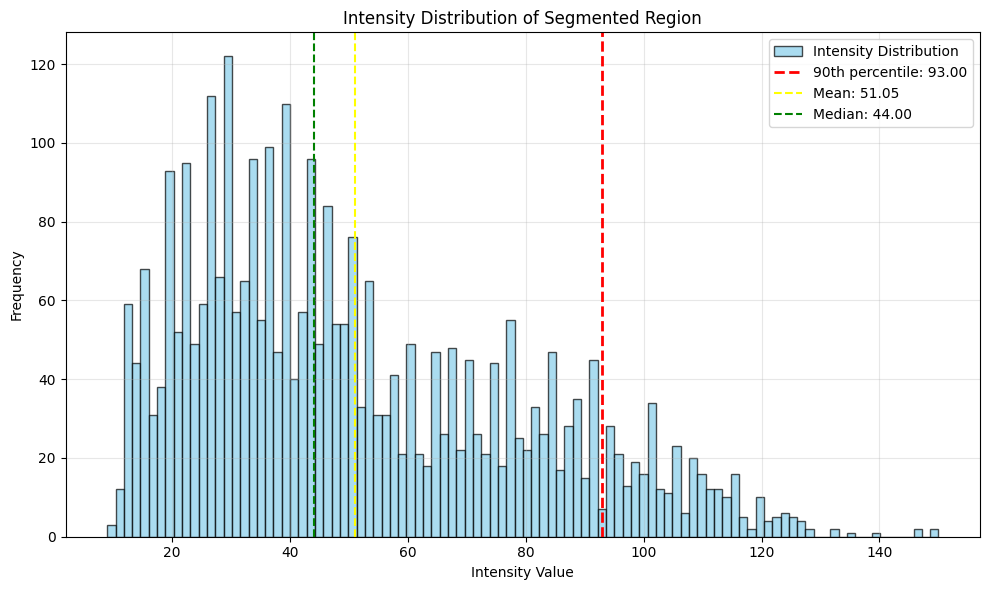

90th Percentile Threshold: 93.00
Mean Intensity: 51.05
Median Intensity: 44.00 
Standard Deviation: 27.86 
min Intensity: 9.00 
max Intensity: 150.00 


In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['intensity'], bins=100, color='skyblue', alpha=0.7, edgecolor='black',label='Intensity Distribution')
plt.title('Intensity Distribution of Segmented Region')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
# plt.grid(axis='y', alpha=0.3)


threshold = df['intensity'].quantile(0.90)
plt.axvline(threshold, color='red', linestyle='--',linewidth=2, label=f'90th percentile: {threshold:.2f}')
plt.axvline(np.mean(intensities), color='yellow', linestyle='dashed', label=f'Mean: {np.mean(intensities):.2f}')
plt.axvline(np.median(intensities), color='green', linestyle='dashed', label=f'Median: {np.median(intensities):.2f}')
plt.legend()

plt.tight_layout()
# plt.savefig('intensity_histogram.png', dpi=300)  # Save the plot
plt.show()

# Print key stats
print(f"90th Percentile Threshold: {threshold:.2f}")
print(f"Mean Intensity: {np.mean(intensities):.2f}")
print(f"Median Intensity: {np.median(intensities):.2f} ")
print(f"Standard Deviation: {np.std(intensities):.2f} ")
print(f"min Intensity: {np.min(intensities):.2f} ")
print(f"max Intensity: {np.max(intensities):.2f} ")

Plot a scatter plot of intensities vs. one spatial dimension:

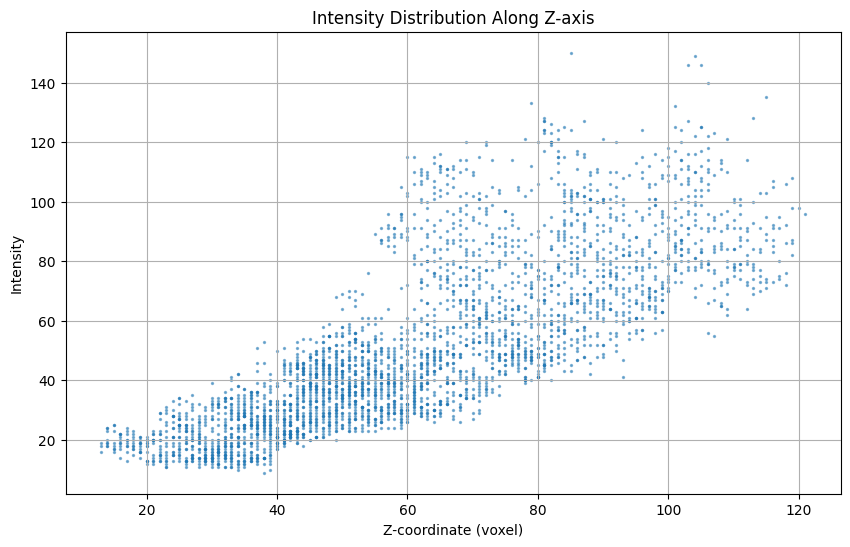

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['z'], df['intensity'], alpha=0.5, s=2)
plt.title('Intensity Distribution Along Z-axis')
plt.xlabel('Z-coordinate (voxel)')
plt.ylabel('Intensity')
plt.grid(True)
plt.savefig('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/intensity_vs_z.png', dpi=300)
plt.show()

Plot a 3D scatter plot of the segmented voxels:

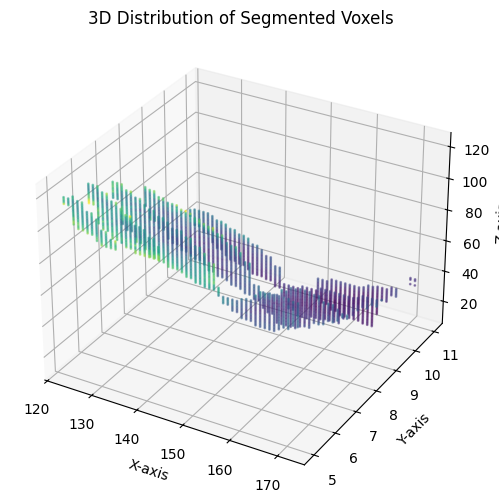

In [143]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['z'], c=df['intensity'], s=1, alpha=0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Distribution of Segmented Voxels')
plt.savefig('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/3d_voxels.png', dpi=300)
plt.show()

#### 2.  Here affine transformation is considered for the coordinates.

In [144]:
# Add a column of 1s to make homogeneous coordinates (Nx4)
ones = np.ones((coordinates.shape[0], 1))
voxel_coords_homogeneous = np.hstack((coordinates, ones))

# Apply affine transformation
world_coords = voxel_coords_homogeneous @ segmented_img.affine.T  # (Nx4) @ (4x4).T → (Nx4)



In [145]:
# Drop the last column (homogeneous '1') to get (x, y, z) in mm
world_coords_mm = world_coords[:, :3]    # Remove homogeneous coordinate   # (3D coordinates in mm) 


print(world_coords_mm)

[[  -7.5    -20.     -22.5  ]
 [  -7.5    -20.     -20.625]
 [  -7.5    -20.     -18.75 ]
 ...
 [  82.5     40.    -172.5  ]
 [  82.5     40.    -170.625]
 [  84.375   20.    -148.125]]


In [146]:
world_coords_mm.shape

(3224, 3)

In [147]:
# Add to DataFrame

# Create a DataFrame with columns: x, y, z, intensity
df_mm = pd.DataFrame({
    'x': world_coords_mm[:, 0],
    'y': world_coords_mm[:, 1],
    'z': world_coords_mm[:, 2],
    'intensity': intensities
})

df_mm.to_csv('segmented_intensities_with_coordinates_mm.csv', index=False)


In [148]:
df_mm

,x,y,z,intensity
0,-7.500,-20.0,-22.500,135.0
1,-7.500,-20.0,-20.625,105.0
2,-7.500,-20.0,-18.750,95.0
3,-7.500,-20.0,-16.875,106.0
4,-7.500,-20.0,-15.000,98.0
...,...,...,...,...
3219,82.500,30.0,-159.375,35.0
3220,82.500,40.0,-178.125,27.0
3221,82.500,40.0,-172.500,30.0
3222,82.500,40.0,-170.625,29.0


Plot intensity Histogram

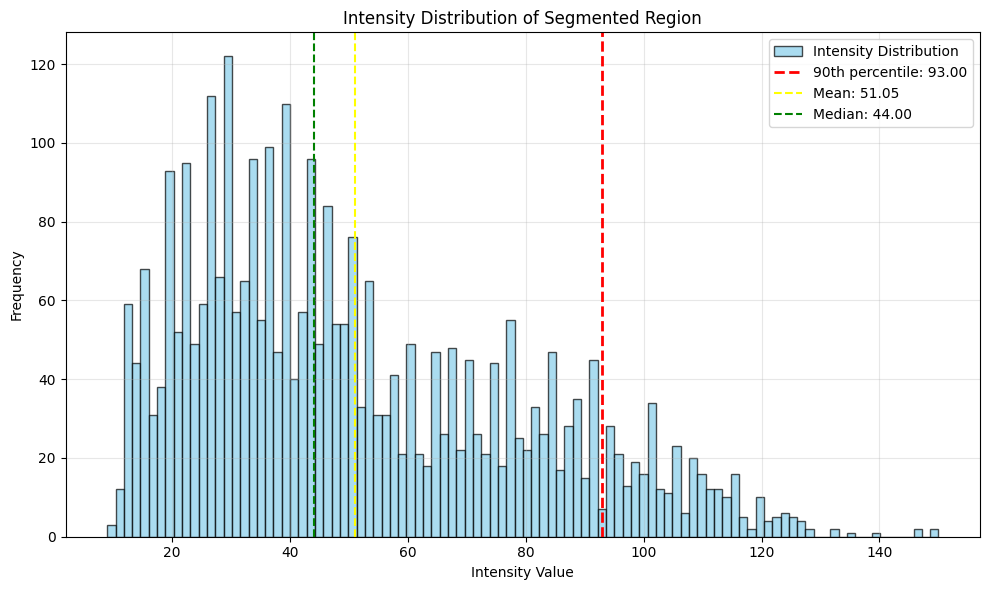

90th Percentile Threshold: 93.00
Mean Intensity: 51.05
Median Intensity: 44.00 
Standard Deviation: 27.86 
min Intensity: 9.00 
max Intensity: 150.00 


In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_mm['intensity'], bins=100, color='skyblue', alpha=0.7, edgecolor='black',label='Intensity Distribution')
plt.title('Intensity Distribution of Segmented Region')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
# plt.grid(axis='y', alpha=0.3)


threshold = df_mm['intensity'].quantile(0.90)
plt.axvline(threshold, color='red', linestyle='--',linewidth=2, label=f'90th percentile: {threshold:.2f}')


plt.axvline(np.mean(intensities), color='yellow', linestyle='dashed', label=f'Mean: {np.mean(intensities):.2f}')
plt.axvline(np.median(intensities), color='green', linestyle='dashed', label=f'Median: {np.median(intensities):.2f}')
plt.legend()

plt.tight_layout()
# plt.savefig('intensity_histogram.png', dpi=300)  # Save the plot
plt.show()

# Print key stats
print(f"90th Percentile Threshold: {threshold:.2f}")
print(f"Mean Intensity: {np.mean(intensities):.2f}")
print(f"Median Intensity: {np.median(intensities):.2f} ")
print(f"Standard Deviation: {np.std(intensities):.2f} ")
print(f"min Intensity: {np.min(intensities):.2f} ")
print(f"max Intensity: {np.max(intensities):.2f} ")


Plot a scatter plot of intensities vs. one spatial dimension:

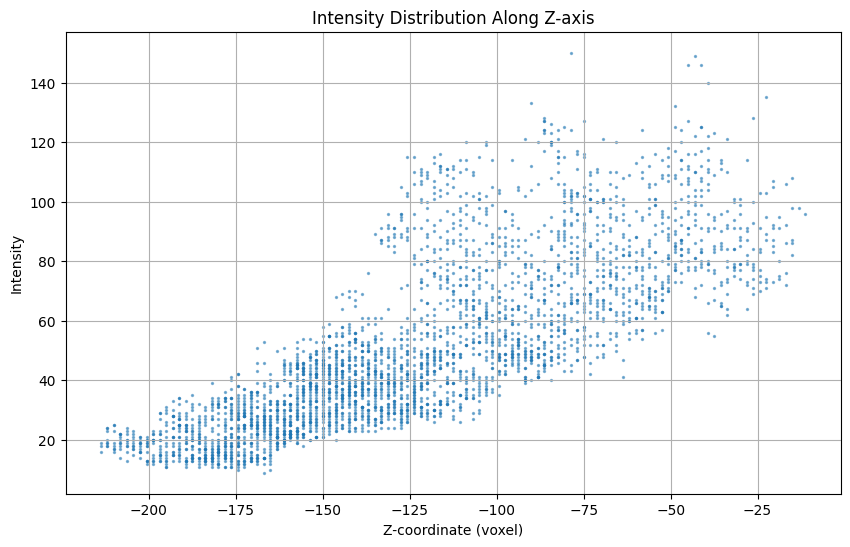

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_mm['z'], df['intensity'], alpha=0.5, s=2)
plt.title('Intensity Distribution Along Z-axis')
plt.xlabel('Z-coordinate (voxel)')
plt.ylabel('Intensity')
plt.grid(True)
plt.savefig('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/intensity_vs_z.png', dpi=300)
plt.show()

Plot a 3D scatter plot of the segmented voxels:

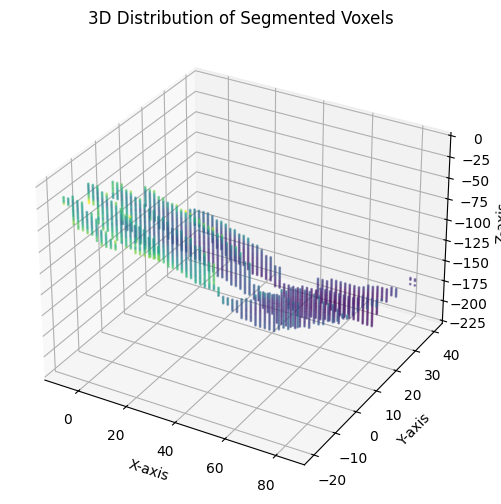

In [151]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_mm['x'], df_mm['y'], df_mm['z'], c=df_mm['intensity'], s=1, alpha=0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Distribution of Segmented Voxels')
plt.savefig('c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/3d_voxels.png', dpi=300)
plt.show()

##### Clustering 

In [152]:
df_mm_cluster = df_mm.copy()

In [153]:
from sklearn.preprocessing import StandardScaler

X = df_mm_cluster[['x', 'y', 'z', 'intensity']].values  # Extract features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize (mean=0, std=1)

### KMEANS

##### Optimal  k Clusters (Elbow Method)

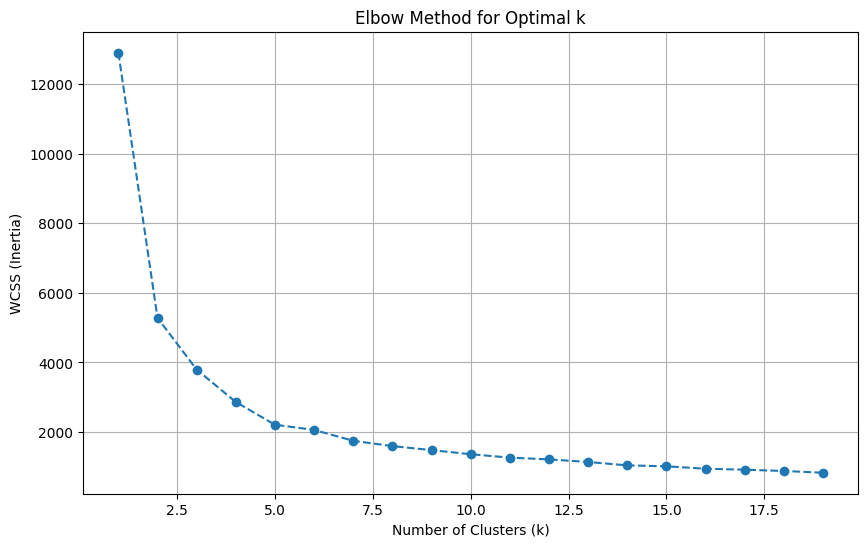

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 20):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

 so here optimal cluster will be 5  (Elbow Method)

In [156]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)


In [157]:
df_mm_cluster['cluster_elbow'] = clusters  

In [158]:
df_mm_cluster.head(5)

,x,y,z,intensity,cluster_elbow
0,-7.5,-20.0,-22.500,135.0,0
1,-7.5,-20.0,-20.625,105.0,0
2,-7.5,-20.0,-18.750,95.0,0
3,-7.5,-20.0,-16.875,106.0,0
4,-7.5,-20.0,-15.000,98.0,0


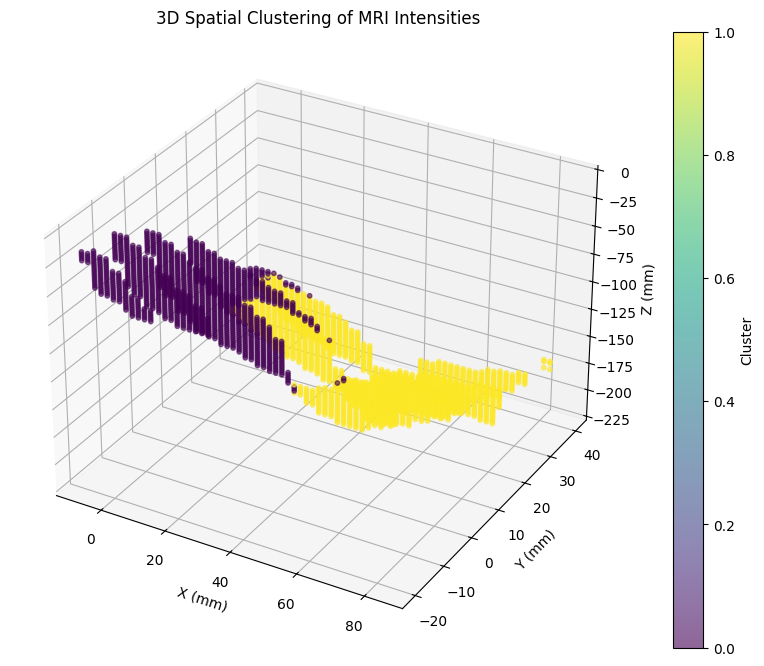

In [159]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_mm_cluster['x'], df_mm_cluster['y'], df_mm_cluster['z'], c=df_mm_cluster['cluster_elbow'], cmap='viridis', s=10, alpha=0.6)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Spatial Clustering of MRI Intensities')
plt.show()

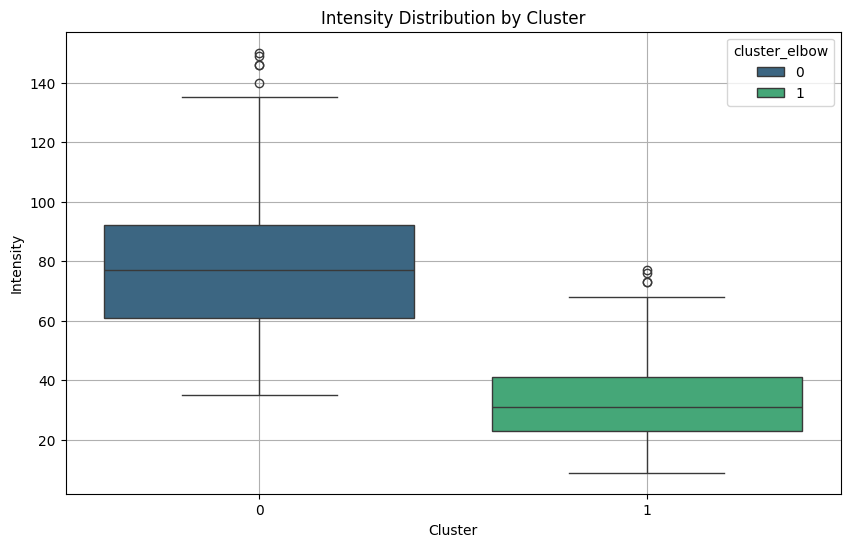

In [160]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_elbow', y='intensity', data=df_mm_cluster, palette='viridis', hue= "cluster_elbow")
plt.title('Intensity Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

##### optimal k using Silhouette Score

In [161]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [162]:
sil_scores = []
k_range = range(2, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)


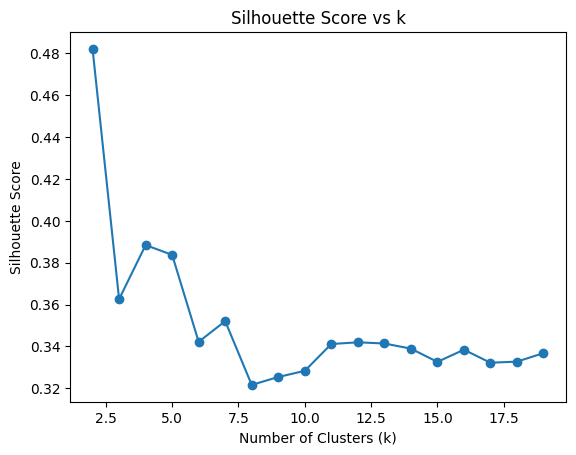

In [163]:
# Plot silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

In [164]:
# Best k
best_k = k_range[np.argmax(sil_scores)]
print(f"Best number of clusters: {best_k}")



Best number of clusters: 2


In [165]:

# Final KMeans clustering with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled )
cluster_Silhouette = kmeans.fit_predict(X_scaled )


In [166]:
df_mm_cluster['cluster_Silhouette'] = cluster_Silhouette

In [167]:
df_mm_cluster.head(5)

,x,y,z,intensity,cluster_elbow,cluster_Silhouette
0,-7.5,-20.0,-22.500,135.0,0,0
1,-7.5,-20.0,-20.625,105.0,0,0
2,-7.5,-20.0,-18.750,95.0,0,0
3,-7.5,-20.0,-16.875,106.0,0,0
4,-7.5,-20.0,-15.000,98.0,0,0


In [168]:
df_mm_cluster["cluster_elbow"].unique()

array([0, 1])

In [169]:
df_mm_cluster["cluster_Silhouette"].unique()

array([0, 1])

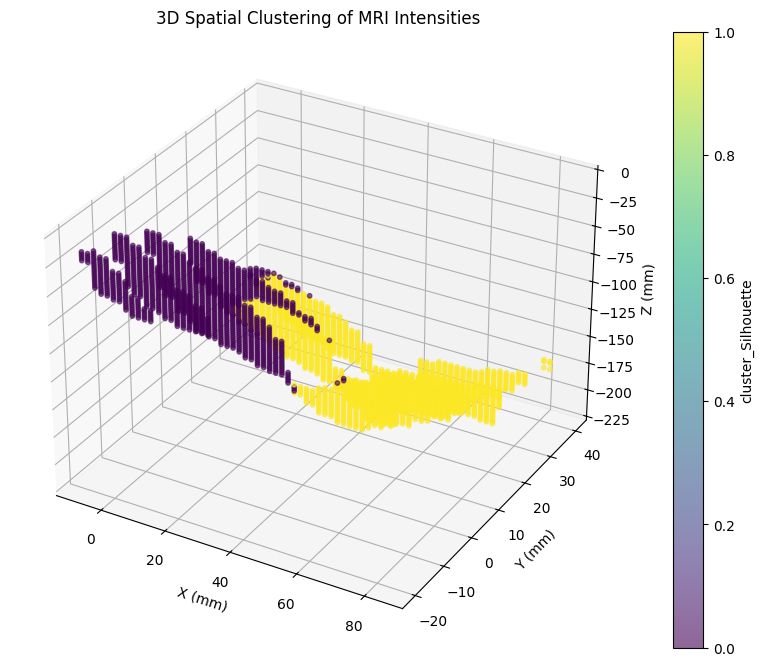

In [170]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_mm_cluster['x'], df_mm_cluster['y'], df_mm_cluster['z'], c=df_mm_cluster['cluster_Silhouette'], cmap='viridis', s=10, alpha=0.6)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.colorbar(scatter, label='cluster_Silhouette')
plt.title('3D Spatial Clustering of MRI Intensities')
plt.show()

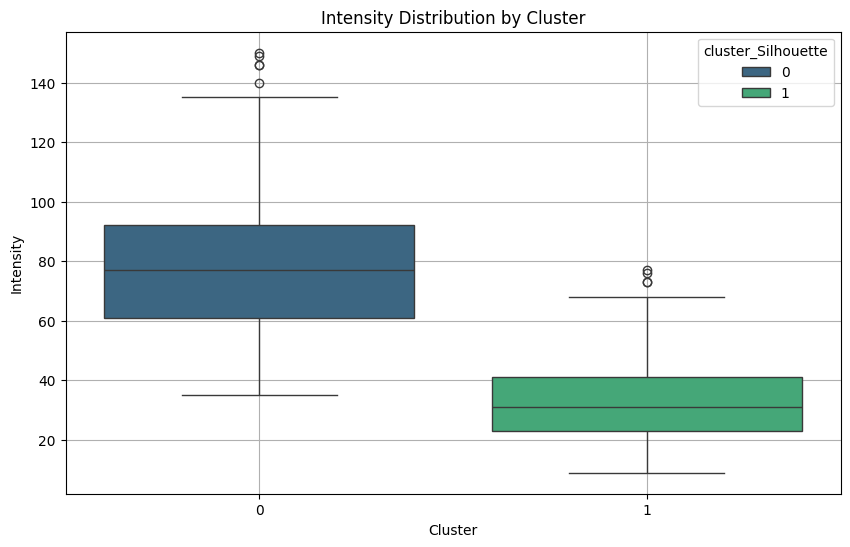

In [171]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_Silhouette', y='intensity', data=df_mm_cluster, palette='viridis', hue= "cluster_Silhouette")
plt.title('Intensity Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [172]:
segmented_data.shape

(256, 13, 256)

#### To visualize the two clusters in the segmented image

In [173]:
# import numpy as np
# import nibabel as nib

# # Load the segmented image 
# # segmented_img = nib.load('segmented_region_3.nii.gz')
# # segmented_data = segmented_img.get_fdata()

# # to store cluster labels (same shape as segmented_data)
# cluster_map = np.zeros_like(segmented_data)

# # # Assign cluster labels to voxels
# # for idx, row in df_mm_cluster.iterrows():
# #     x, y, z = int(row['x']), int(row['y']), int(row['z'])
# #     cluster_map[x, y, z] = row['cluster_Silhouette'] + 1  # +1 to avoid 0 (background)



# #  Map the clusters back to the 3D array
# for i, (x, y, z) in enumerate(df_mm_cluster[['x', 'y', 'z']].values.astype(int)):
#     cluster_map[x, y, z] = df_mm_cluster['cluster_Silhouette'].iloc[i]


In [174]:
# # Save the clustered data as a new NIfTI file
# clustered_img = nib.Nifti1Image(clustered_data, segmented_img.affine, segmented_img.header)
# nib.save(clustered_img, 'segmented_clusters.nii.gz')

# print("Clustered NIfTI file saved as 'segmented_clusters.nii.gz'")

In [175]:
segmented_img.affine

array([[   1.875,    0.   ,    0.   , -238.125],
       [   0.   ,   10.   ,    0.   ,  -70.   ],
       [   0.   ,    0.   ,    1.875, -238.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])

use the inverse affine transformation to map the world coordinates (from the CSV) back to voxel indices.

In [176]:
# Get the affine matrix and its inverse
affine = segmented_img.affine
affine_inv = np.linalg.inv(affine)


In [177]:
df_mm_cluster

,x,y,z,intensity,cluster_elbow,cluster_Silhouette
0,-7.500,-20.0,-22.500,135.0,0,0
1,-7.500,-20.0,-20.625,105.0,0,0
2,-7.500,-20.0,-18.750,95.0,0,0
3,-7.500,-20.0,-16.875,106.0,0,0
4,-7.500,-20.0,-15.000,98.0,0,0
...,...,...,...,...,...,...
3219,82.500,30.0,-159.375,35.0,1,1
3220,82.500,40.0,-178.125,27.0,1,1
3221,82.500,40.0,-172.500,30.0,1,1
3222,82.500,40.0,-170.625,29.0,1,1


In [178]:
# Extract world coordinates and convert back to voxel indices
world_coords = df_mm_cluster[['x', 'y', 'z']].values  # World coordinates (in mm)
voxel_coords = np.dot(np.c_[world_coords, np.ones(world_coords.shape[0])], affine_inv.T)[:, :3]  # Convert to voxel indices

# Round and convert to integers
voxel_coords = np.round(voxel_coords).astype(int)



In [179]:
voxel_coords.shape

(3224, 3)

In [180]:
segmented_data.shape

(256, 13, 256)

In [181]:
coordinates

array([[123,   5, 115],
       [123,   5, 116],
       [123,   5, 117],
       ...,
       [171,  11,  35],
       [171,  11,  36],
       [172,   9,  48]], dtype=int64)

In [182]:
world_coords_mm

array([[  -7.5  ,  -20.   ,  -22.5  ],
       [  -7.5  ,  -20.   ,  -20.625],
       [  -7.5  ,  -20.   ,  -18.75 ],
       ...,
       [  82.5  ,   40.   , -172.5  ],
       [  82.5  ,   40.   , -170.625],
       [  84.375,   20.   , -148.125]])

In [183]:
voxel_coords[:, 0]

array([123, 123, 123, ..., 171, 171, 172])

In [184]:
df_mm_cluster_back = pd.DataFrame({
    'x_voxel': voxel_coords[:, 0],
    'y_voxel': voxel_coords[:, 1],
    'z_voxel': voxel_coords[:, 2],
    'intensity': df_mm_cluster['intensity'],
    'cluster_Silhouette': df_mm_cluster['cluster_Silhouette']
})

In [185]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette
0,123,5,115,135.0,0
1,123,5,116,105.0,0
2,123,5,117,95.0,0
3,123,5,118,106.0,0
4,123,5,119,98.0,0
...,...,...,...,...,...
3219,171,10,42,35.0,1
3220,171,11,32,27.0,1
3221,171,11,35,30.0,1
3222,171,11,36,29.0,1


In [186]:
df_mm_cluster_back['cluster_Silhouette'] = df_mm_cluster_back['cluster_Silhouette'].replace(0, 2)    # now we have 2 different clusters 1 and 2 . here i have replaced 0 with 2.

In [187]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette
0,123,5,115,135.0,2
1,123,5,116,105.0,2
2,123,5,117,95.0,2
3,123,5,118,106.0,2
4,123,5,119,98.0,2
...,...,...,...,...,...
3219,171,10,42,35.0,1
3220,171,11,32,27.0,1
3221,171,11,35,30.0,1
3222,171,11,36,29.0,1


In [188]:
# Create an empty array for the cluster map
cluster_map = np.zeros_like(segmented_data, dtype=np.int32)



In [189]:
# Map the clusters back to the 3D array
for i, (x, y, z) in enumerate(df_mm_cluster_back[['x_voxel', 'y_voxel', 'z_voxel']].values):
    cluster_map[x, y, z] = df_mm_cluster_back['cluster_Silhouette'].iloc[i]  

In [190]:
cluster_map.shape

(256, 13, 256)

In [191]:
# cluster_map

In [192]:
# Save the cluster map as a NIfTI file
cluster_img = nib.Nifti1Image(cluster_map, segmented_img.affine, segmented_img.header)
nib.save(cluster_img, 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/cluster_labels_kmeans.nii.gz')

print("Clustered NIfTI file saved as 'cluster_labels.nii.gz'")

Clustered NIfTI file saved as 'cluster_labels.nii.gz'


### GMM all  covariance_type = full

In [195]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [196]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette
0,123,5,115,135.0,2
1,123,5,116,105.0,2
2,123,5,117,95.0,2
3,123,5,118,106.0,2
4,123,5,119,98.0,2
...,...,...,...,...,...
3219,171,10,42,35.0,1
3220,171,11,32,27.0,1
3221,171,11,35,30.0,1
3222,171,11,36,29.0,1


In [197]:
# Features: x, y, z, intensity
X = df_mm_cluster_back[['x_voxel', 'y_voxel', 'z_voxel', 'intensity']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Plot BIC and AIC scores


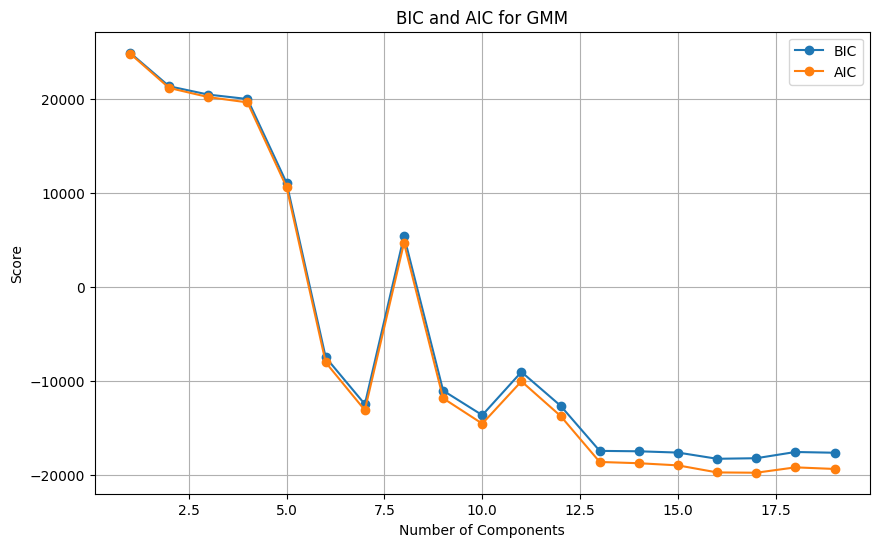

In [198]:
bic_scores = []
aic_scores = []
k_range = range(1, 20)  # Test 1 to 20 components

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

plt.figure(figsize=(10, 6))
plt.plot(k_range, bic_scores, label='BIC', marker='o')
plt.plot(k_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM')
plt.legend()
plt.grid(True)
plt.show()

In [199]:
#  optimal number of components
optimal_aic = k_range[np.argmin(aic_scores)]  # Index of minimum AIC
optimal_bic = k_range[np.argmin(bic_scores)]  # Index of minimum BIC

print(f"Optimal number of components based on AIC:k= {optimal_aic}")
print(f"Optimal number of components based on BIC:k= {optimal_bic}")

Optimal number of components based on AIC:k= 17
Optimal number of components based on BIC:k= 16


In [200]:
# optimal_components = optimal_bic  
optimal_components = 2  

gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=2, random_state=42)

In [201]:
gmm_clusters = gmm.predict(X_scaled)
df_mm_cluster_back['cluster_gmm'] = gmm_clusters

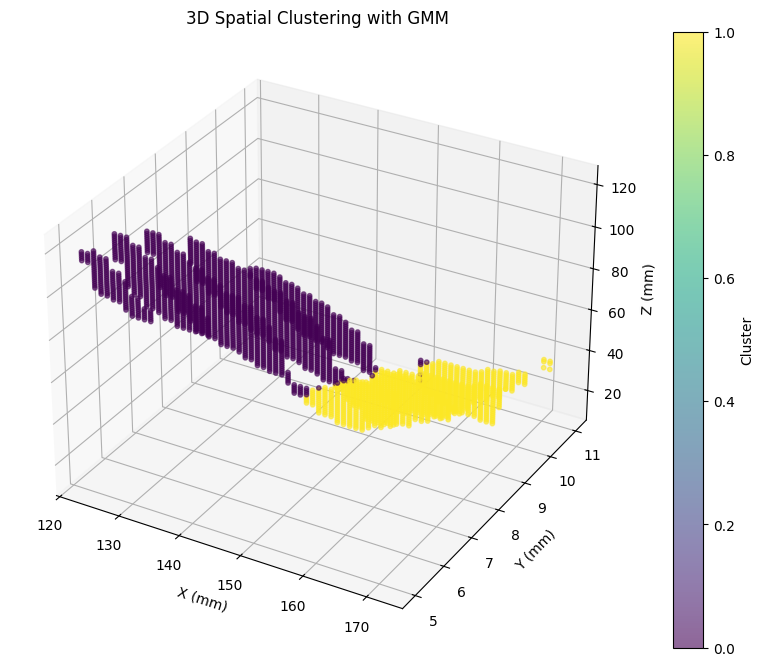

In [202]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_mm_cluster_back['x_voxel'], df_mm_cluster_back['y_voxel'], df_mm_cluster_back['z_voxel'], c=df_mm_cluster_back['cluster_gmm'], cmap='viridis', s=10, alpha=0.6)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Spatial Clustering with GMM')
plt.show()

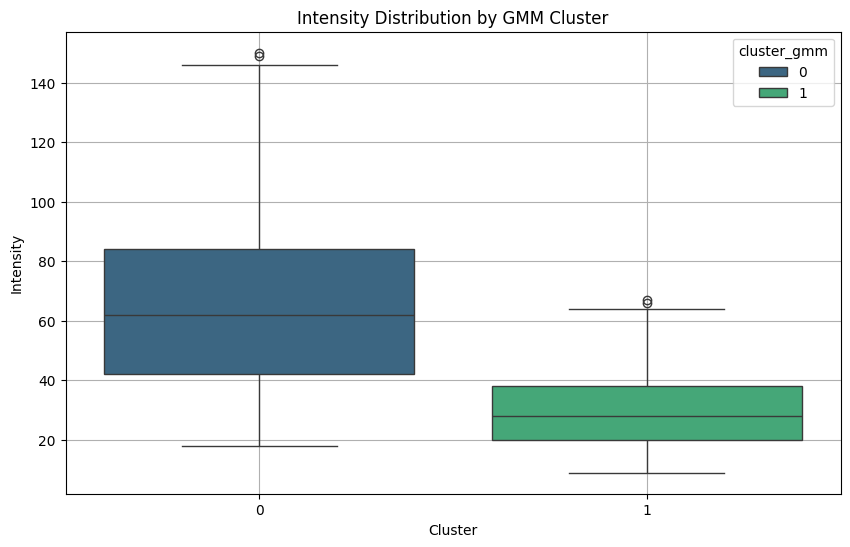

In [203]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_gmm', y='intensity', data=df_mm_cluster_back, palette='viridis', hue="cluster_gmm")
plt.title('Intensity Distribution by GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [204]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette,cluster_gmm
0,123,5,115,135.0,2,0
1,123,5,116,105.0,2,0
2,123,5,117,95.0,2,0
3,123,5,118,106.0,2,0
4,123,5,119,98.0,2,0
...,...,...,...,...,...,...
3219,171,10,42,35.0,1,1
3220,171,11,32,27.0,1,1
3221,171,11,35,30.0,1,1
3222,171,11,36,29.0,1,1


In [205]:
df_mm_cluster_back["cluster_gmm"].unique()

array([0, 1], dtype=int64)

In [206]:
# df_mm_cluster_back['cluster_gmm'] = df_mm_cluster_back['cluster_gmm'].replace(0, 16)   
df_mm_cluster_back['cluster_gmm'] = df_mm_cluster_back['cluster_gmm'].replace(0, 2)   


In [207]:
cluster_map_gmm = np.zeros_like(segmented_data, dtype=np.int32)


In [208]:
# Map the clusters back to the 3D array
for i, (x, y, z) in enumerate(df_mm_cluster_back[['x_voxel', 'y_voxel', 'z_voxel']].values):
    cluster_map_gmm[x, y, z] = df_mm_cluster_back['cluster_gmm'].iloc[i]  

In [209]:

cluster_img_gmm = nib.Nifti1Image(cluster_map_gmm, segmented_img.affine, segmented_img.header)
nib.save(cluster_img_gmm, 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/gmm_cluster_labels_all.nii.gz')

print("GMM Clustered NIfTI file saved as 'gmm_cluster_labels.nii.gz'")

GMM Clustered NIfTI file saved as 'gmm_cluster_labels.nii.gz'


In [210]:
merged_df.tail(15)

,x,y,z,Intensity,cluster_gmm_based_on_only_intensity,FSI,WSI,FatFraction
3209,171,9,43,53.0,1,0.0,53.0,0.0
3210,171,9,44,54.0,1,0.0,54.0,0.0
3211,171,9,45,48.0,1,0.0,48.0,0.0
3212,171,9,46,47.0,1,0.0,47.0,0.0
3213,171,9,47,46.0,1,0.0,46.0,0.0
3214,171,10,37,39.0,1,0.0,39.0,0.0
3215,171,10,38,38.0,1,0.0,38.0,0.0
3216,171,10,39,37.0,1,0.0,37.0,0.0
3217,171,10,40,38.0,1,0.0,38.0,0.0
3218,171,10,41,40.0,1,0.0,40.0,0.0


In [211]:
(df_mm_cluster_back["cluster_gmm"] == merged_df["cluster_gmm_based_on_only_intensity"]).unique()


array([ True, False])

In [212]:
(df_mm_cluster_back["cluster_gmm"] == merged_df["cluster_gmm_based_on_only_intensity"]).value_counts()

True     2291
False     933
Name: count, dtype: int64

In [213]:
merged_df["cluster_gmm_based_on_only_intensity"].value_counts()

cluster_gmm_based_on_only_intensity
1    2143
2    1081
Name: count, dtype: int64

In [214]:
df_mm_cluster_back["cluster_gmm"].value_counts()

cluster_gmm
2    2000
1    1224
Name: count, dtype: int64

### GMM all  covariance_type = diagonal

In [215]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [216]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette,cluster_gmm
0,123,5,115,135.0,2,2
1,123,5,116,105.0,2,2
2,123,5,117,95.0,2,2
3,123,5,118,106.0,2,2
4,123,5,119,98.0,2,2
...,...,...,...,...,...,...
3219,171,10,42,35.0,1,1
3220,171,11,32,27.0,1,1
3221,171,11,35,30.0,1,1
3222,171,11,36,29.0,1,1


In [217]:
# Features: x, y, z, intensity
X = df_mm_cluster_back[['x_voxel', 'y_voxel', 'z_voxel', 'intensity']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Plot BIC and AIC scores


Initialization 0
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.
Initialization 0
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Initialization 0
  Iteration 10
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Initialization 0
  Iteration 10
  Iter

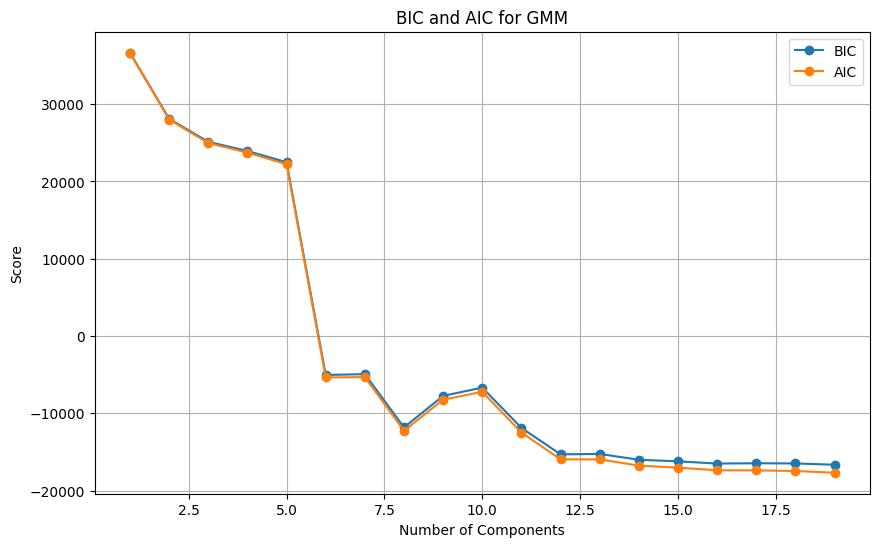

In [218]:
bic_scores = []
aic_scores = []
k_range = range(1, 20)  # Test 1 to 20 components

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type= "diag", random_state=42,verbose=1)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

plt.figure(figsize=(10, 6))
plt.plot(k_range, bic_scores, label='BIC', marker='o')
plt.plot(k_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM')
plt.legend()
plt.grid(True)
plt.show()

In [219]:
#  optimal number of components
optimal_aic = k_range[np.argmin(aic_scores)]  # Index of minimum AIC
optimal_bic = k_range[np.argmin(bic_scores)]  # Index of minimum BIC

print(f"Optimal number of components based on AIC:k= {optimal_aic}")
print(f"Optimal number of components based on BIC:k= {optimal_bic}")

Optimal number of components based on AIC:k= 19
Optimal number of components based on BIC:k= 19


In [220]:
# optimal_components = optimal_bic  
optimal_components = 2  

gmm = GaussianMixture(n_components=optimal_components, covariance_type= "diag", random_state=42)
gmm.fit(X_scaled)

GaussianMixture(covariance_type='diag', n_components=2, random_state=42)

In [221]:
gmm_clusters_diag = gmm.predict(X_scaled)
df_mm_cluster_back['gmm_clusters_diag'] = gmm_clusters_diag

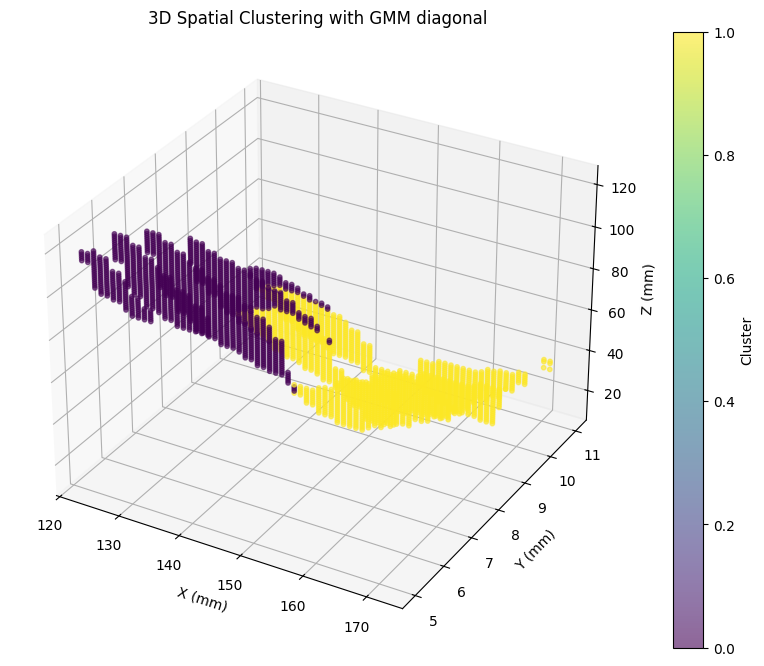

In [222]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_mm_cluster_back['x_voxel'], df_mm_cluster_back['y_voxel'], df_mm_cluster_back['z_voxel'], c=df_mm_cluster_back['gmm_clusters_diag'], cmap='viridis', s=10, alpha=0.6)
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.colorbar(scatter, label='Cluster')
plt.title('3D Spatial Clustering with GMM diagonal')
plt.show()

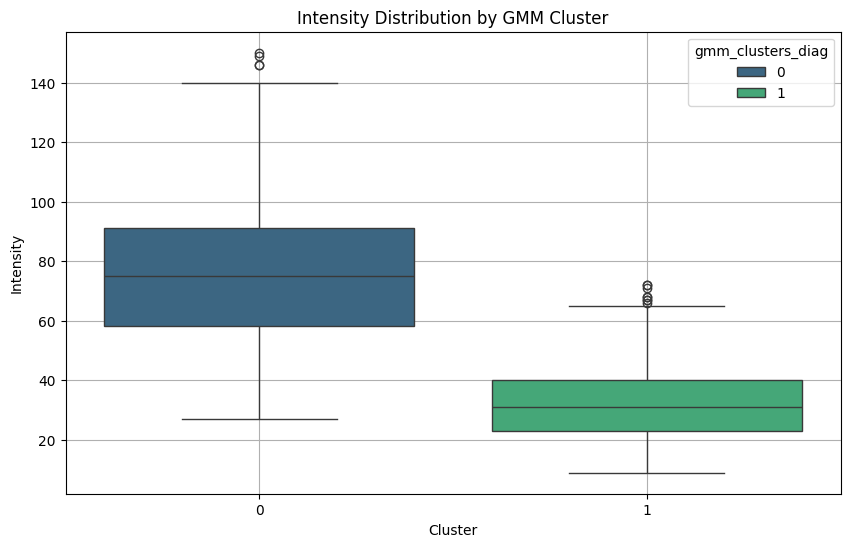

In [223]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='gmm_clusters_diag', y='intensity', data=df_mm_cluster_back, palette='viridis', hue="gmm_clusters_diag")
plt.title('Intensity Distribution by GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [224]:
df_mm_cluster_back

,x_voxel,y_voxel,z_voxel,intensity,cluster_Silhouette,cluster_gmm,gmm_clusters_diag
0,123,5,115,135.0,2,2,0
1,123,5,116,105.0,2,2,0
2,123,5,117,95.0,2,2,0
3,123,5,118,106.0,2,2,0
4,123,5,119,98.0,2,2,0
...,...,...,...,...,...,...,...
3219,171,10,42,35.0,1,1,1
3220,171,11,32,27.0,1,1,1
3221,171,11,35,30.0,1,1,1
3222,171,11,36,29.0,1,1,1


In [225]:
df_mm_cluster_back["gmm_clusters_diag"].unique()

array([0, 1], dtype=int64)

In [226]:
# df_mm_cluster_back['cluster_gmm'] = df_mm_cluster_back['cluster_gmm'].replace(0, 16)   
df_mm_cluster_back['gmm_clusters_diag'] = df_mm_cluster_back['gmm_clusters_diag'].replace(0, 2)   


In [227]:
cluster_map_gmm = np.zeros_like(segmented_data, dtype=np.int32)


In [228]:
# Map the clusters back to the 3D array
for i, (x, y, z) in enumerate(df_mm_cluster_back[['x_voxel', 'y_voxel', 'z_voxel']].values):
    cluster_map_gmm[x, y, z] = df_mm_cluster_back['gmm_clusters_diag'].iloc[i]  

In [229]:

cluster_img_gmm_diagonal = nib.Nifti1Image(cluster_map_gmm, segmented_img.affine, segmented_img.header)
nib.save(cluster_img_gmm_diagonal, 'c:/Users/praba/Documents/GitHub/Inria_Medical_Imageing_Internship_prabal/s0006/cluster_code/gmm_cluster_labels_diagonal.nii.gz')

print("GMM Clustered NIfTI file saved as 'gmm_cluster_labels_diagonal.nii.gz'")

GMM Clustered NIfTI file saved as 'gmm_cluster_labels_diagonal.nii.gz'
